<a href="https://colab.research.google.com/github/aishwarya-r29/DPL-2025/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

# Path to your dataset folder
data_path = "/content/drive/MyDrive/Colab Notebooks/TrendDataset"

# List all files in the dataset folder
files = os.listdir(data_path)
print("Files in dataset folder:", files)

Files in dataset folder: ['2000-2012_Export.csv', 'Employment_Unemployment.csv', 'Core_economic_indicators.csv', 'crop_and_livestock.csv', '2013-2024_Export.csv', 'Resiliance.csv', 'population_and_demographics.csv', '2013-2024_Import.csv', 'Social_and_welfare.csv', '2000-2012_Import.csv', 'disasters.csv']


In [3]:
import pandas as pd

dataframes = {}
for file in files:
    file_path = os.path.join(data_path, file)
    df_name = file.replace(".csv", "")
    try:
        # Try utf-8 first
        dataframes[df_name] = pd.read_csv(file_path, encoding="utf-8")
    except UnicodeDecodeError:
        # Fallback to latin1 if utf-8 fails
        dataframes[df_name] = pd.read_csv(file_path, encoding="latin1")

# Show dataset names and shapes
for name, df in dataframes.items():
    print(f"{name}: {df.shape}")

2000-2012_Export: (41938, 47)
Employment_Unemployment: (480, 29)
Core_economic_indicators: (180, 29)
crop_and_livestock: (185181, 15)
2013-2024_Export: (41876, 47)
Resiliance: (80, 29)
population_and_demographics: (3000, 15)
2013-2024_Import: (46311, 47)
Social_and_welfare: (205, 29)
2000-2012_Import: (47373, 47)
disasters: (3613, 46)


In [4]:
# Show column names for each dataset
for name, df in dataframes.items():
    print(f"\n{name} → {df.shape}")
    print(df.columns.tolist()[:10])  # show only first 10 cols for brevity



2000-2012_Export → (41938, 47)
['typeCode', 'freqCode', 'refPeriodId', 'refYear', 'refMonth', 'period', 'reporterCode', 'reporterISO', 'reporterDesc', 'flowCode']

Employment_Unemployment → (480, 29)
['Country Name', 'Country Code', 'Series Name', 'Series Code', '2000 [YR2000]', '2001 [YR2001]', '2002 [YR2002]', '2003 [YR2003]', '2004 [YR2004]', '2005 [YR2005]']

Core_economic_indicators → (180, 29)
['Country Name', 'Country Code', 'Series Name', 'Series Code', '2000 [YR2000]', '2001 [YR2001]', '2002 [YR2002]', '2003 [YR2003]', '2004 [YR2004]', '2005 [YR2005]']

crop_and_livestock → (185181, 15)
['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code', 'Element', 'Item Code (CPC)', 'Item', 'Year Code', 'Year']

2013-2024_Export → (41876, 47)
['typeCode', 'freqCode', 'refPeriodId', 'refYear', 'refMonth', 'period', 'reporterCode', 'reporterISO', 'reporterDesc', 'flowCode']

Resiliance → (80, 29)
['Country Name', 'Country Code', 'Series Name', 'Series Code', '2000 [YR2000]', '

In [5]:
# Step 5: Inspect schema + sample rows for each loaded DataFrame
import re
pd.set_option("display.max_columns", 100)

def detect_keys(cols):
    cols_lower = [c.lower() for c in cols]
    country_candidates = [c for c in cols if re.search(r'country|area|reporter|reporterdesc|area|iso', c, re.I)]
    iso_candidates = [c for c in cols if re.search(r'iso|iso3|reporteriso|partneriso', c, re.I)]
    year_candidates = [c for c in cols if re.search(r'\byear\b|refyear|yr|refperiod|period|yearcode', c, re.I)]
    return country_candidates, iso_candidates, year_candidates

for name, df in dataframes.items():
    print("\n" + "="*80)
    print(f"Dataset: {name}    shape: {df.shape}")
    print("- columns (showing all):")
    print(list(df.columns))
    country_cols, iso_cols, year_cols = detect_keys(df.columns)
    print("\nDetected linking key candidates:")
    print("  Country-like columns:", country_cols if country_cols else "None detected")
    print("  ISO-like columns:    ", iso_cols if iso_cols else "None detected")
    print("  Year-like columns:   ", year_cols if year_cols else "None detected")
    print("\nSample rows (first 3):")
    display(df.head(3))
    # show value counts for detected keys if present (up to 10)
    if country_cols:
        c = country_cols[0]
        print(f"\n  Sample unique values for '{c}':", pd.Series(df[c].dropna().unique()[:10]).tolist())
    if iso_cols:
        i = iso_cols[0]
        print(f"  Sample unique values for '{i}':", pd.Series(df[i].dropna().unique()[:10]).tolist())
    if year_cols:
        y = year_cols[0]
        print(f"  Sample unique values for '{y}':", pd.Series(df[y].dropna().unique()[:10]).tolist())



Dataset: 2000-2012_Export    shape: (41938, 47)
- columns (showing all):
['typeCode', 'freqCode', 'refPeriodId', 'refYear', 'refMonth', 'period', 'reporterCode', 'reporterISO', 'reporterDesc', 'flowCode', 'flowDesc', 'partnerCode', 'partnerISO', 'partnerDesc', 'partner2Code', 'partner2ISO', 'partner2Desc', 'classificationCode', 'classificationSearchCode', 'isOriginalClassification', 'cmdCode', 'cmdDesc', 'aggrLevel', 'isLeaf', 'customsCode', 'customsDesc', 'mosCode', 'motCode', 'motDesc', 'qtyUnitCode', 'qtyUnitAbbr', 'qty', 'isQtyEstimated', 'altQtyUnitCode', 'altQtyUnitAbbr', 'altQty', 'isAltQtyEstimated', 'netWgt', 'isNetWgtEstimated', 'grossWgt', 'isGrossWgtEstimated', 'cifvalue', 'fobvalue', 'primaryValue', 'legacyEstimationFlag', 'isReported', 'isAggregate']

Detected linking key candidates:
  Country-like columns: ['reporterCode', 'reporterISO', 'reporterDesc', 'partnerISO', 'partner2ISO', 'isOriginalClassification']
  ISO-like columns:     ['reporterISO', 'partnerISO', 'partne

,typeCode,freqCode,refPeriodId,refYear,refMonth,period,reporterCode,reporterISO,reporterDesc,flowCode,flowDesc,partnerCode,partnerISO,partnerDesc,partner2Code,partner2ISO,partner2Desc,classificationCode,classificationSearchCode,isOriginalClassification,cmdCode,cmdDesc,aggrLevel,isLeaf,customsCode,customsDesc,mosCode,motCode,motDesc,qtyUnitCode,qtyUnitAbbr,qty,isQtyEstimated,altQtyUnitCode,altQtyUnitAbbr,altQty,isAltQtyEstimated,netWgt,isNetWgtEstimated,grossWgt,isGrossWgtEstimated,cifvalue,fobvalue,primaryValue,legacyEstimationFlag,isReported,isAggregate
C,A,20000101,2000,52,2000,8,ALB,Albania,X,Export,4,AFG,Afghanistan,0,W00,World,H1,HS,True,TOTAL,All Commodities,0,False,C00,TOTAL CPC,0,0,TOTAL MOT,-1,NaN,NaN,False,-1,NaN,NaN,False,NaN,False,NaN,False,NaN,209.0,209.0,0,False,False,NaN
C,A,20000101,2000,52,2000,8,ALB,Albania,X,Export,36,AUS,Australia,0,W00,World,H1,HS,True,TOTAL,All Commodities,0,False,C00,TOTAL CPC,0,0,TOTAL MOT,-1,NaN,NaN,False,-1,NaN,NaN,False,NaN,False,NaN,False,NaN,22288.0,22288.0,0,False,False,NaN
C,A,20000101,2000,52,2000,8,ALB,Albania,X,Export,56,BEL,Belgium,0,W00,World,H1,HS,True,TOTAL,All Commodities,0,False,C00,TOTAL CPC,0,0,TOTAL MOT,-1,NaN,NaN,False,-1,NaN,NaN,False,NaN,False,NaN,False,NaN,266645.0,266645.0,0,False,False,NaN



  Sample unique values for 'reporterCode': ['ALB', 'DZA', 'AND', 'ATG', 'AZE', 'ARG', 'AUS', 'AUT', 'BHS', 'BHR']
  Sample unique values for 'reporterISO': ['Albania', 'Algeria', 'Andorra', 'Antigua and Barbuda', 'Azerbaijan', 'Argentina', 'Australia', 'Austria', 'Bahamas', 'Bahrain']
  Sample unique values for 'refPeriodId': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009]

Dataset: Employment_Unemployment    shape: (480, 29)
- columns (showing all):
['Country Name', 'Country Code', 'Series Name', 'Series Code', '2000 [YR2000]', '2001 [YR2001]', '2002 [YR2002]', '2003 [YR2003]', '2004 [YR2004]', '2005 [YR2005]', '2006 [YR2006]', '2007 [YR2007]', '2008 [YR2008]', '2009 [YR2009]', '2010 [YR2010]', '2011 [YR2011]', '2012 [YR2012]', '2013 [YR2013]', '2014 [YR2014]', '2015 [YR2015]', '2016 [YR2016]', '2017 [YR2017]', '2018 [YR2018]', '2019 [YR2019]', '2020 [YR2020]', '2021 [YR2021]', '2022 [YR2022]', '2023 [YR2023]', '2024 [YR2024]']

Detected linking key candidates:
  Country

,Country Name,Country Code,Series Name,Series Code,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023],2024 [YR2024]
0,India,IND,"Unemployment with advanced education, male (% ...",SL.UEM.ADVN.MA.ZS,8.389,..,..,..,..,7.009,..,..,..,..,5.605,..,6.372,..,..,..,..,..,14.039,13.56,15.269,13.5,12.052,10.839,..
1,India,IND,"Unemployment with advanced education, female (...",SL.UEM.ADVN.FE.ZS,21.12,..,..,..,..,20.829,..,..,..,..,16.039,..,15.305,..,..,..,..,..,25.439,22.577,26.785,23.395,21.424,20.594,..
2,India,IND,Unemployment with basic education (% of total ...,SL.UEM.BASC.ZS,3.941,..,..,..,..,4.124,..,..,..,..,3.035,..,2.954,..,..,..,..,..,6.394,4.937,6.368,4.877,3.095,2.473,..



  Sample unique values for 'Country Name': ['India', 'United States', 'Russian Federation', 'France', 'Germany', 'Italy', 'China', 'Japan', 'Argentina', 'Afghanistan']
  Sample unique values for '2000 [YR2000]': ['8.389', '21.12', '3.941', '6.143', '3.6', '22.418', '57.651', '31.753', '77.894', '22.749']

Dataset: Core_economic_indicators    shape: (180, 29)
- columns (showing all):
['Country Name', 'Country Code', 'Series Name', 'Series Code', '2000 [YR2000]', '2001 [YR2001]', '2002 [YR2002]', '2003 [YR2003]', '2004 [YR2004]', '2005 [YR2005]', '2006 [YR2006]', '2007 [YR2007]', '2008 [YR2008]', '2009 [YR2009]', '2010 [YR2010]', '2011 [YR2011]', '2012 [YR2012]', '2013 [YR2013]', '2014 [YR2014]', '2015 [YR2015]', '2016 [YR2016]', '2017 [YR2017]', '2018 [YR2018]', '2019 [YR2019]', '2020 [YR2020]', '2021 [YR2021]', '2022 [YR2022]', '2023 [YR2023]', '2024 [YR2024]']

Detected linking key candidates:
  Country-like columns: ['Country Name', 'Country Code']
  ISO-like columns:     None detec

,Country Name,Country Code,Series Name,Series Code,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023],2024 [YR2024]
0,India,IND,Imports of goods and services (% of GDP),NE.IMP.GNFS.ZS,13.9036865990995,13.4348751195257,15.2442790107467,15.6445222747346,19.6446890963991,22.3964229200356,24.4565390770687,24.8865689304448,29.2708631790835,25.8723502685274,26.8542732486216,31.0834686939585,31.2592910673332,28.4132706461587,25.9542227389497,22.1097247094602,20.9242508026814,21.9507321152243,23.6891407335327,21.2411386333872,19.0756283996012,24.0239304534931,26.8237289453584,23.544144504402,23.4929703141577
1,India,IND,Exports of goods and services (% of GDP),NE.EXP.GNFS.ZS,12.9972363113479,12.5583796339108,14.2643839243147,14.9479138581734,17.8591249630479,19.6052466948335,21.2679414221966,20.7996997489032,24.0973572601391,20.4005193743564,22.4009332487945,24.5404113195713,24.534430661418,25.430861300519,22.9679630081172,19.8131891564045,19.1582349105946,18.7917648392982,19.9278285988562,18.664264897257,18.6824769296756,21.3991583305515,23.2515412045298,21.4486977833541,21.1781223210845
2,India,IND,Trade (% of GDP),NE.TRD.GNFS.ZS,26.9009229104474,25.9932547534365,29.5086629350614,30.592436132908,37.503814059447,42.0016696148691,45.7244804992652,45.686268679348,53.3682204392226,46.2728696428837,49.2552064974161,55.6238800135298,55.7937217287511,53.8441319466777,48.9221857470669,41.9229138658647,40.082485713276,40.7424969545225,43.6169693323889,39.9054035306442,37.7581053292768,45.4230887840446,50.0752701498882,44.9928422877561,44.6710926352422



  Sample unique values for 'Country Name': ['India', 'United States', 'Russian Federation', 'France', 'Germany', 'Italy', 'China', 'Japan', 'Argentina', 'Afghanistan']
  Sample unique values for '2000 [YR2000]': ['13.9036865990995', '12.9972363113479', '26.9009229104474', '4.0094359104519', '3.84099115659129', '442.750218937263', '468395521654.458', '14.4102128270623', '10.6927727297913', '25.1029855568536']

Dataset: crop_and_livestock    shape: (185181, 15)
- columns (showing all):
['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code', 'Element', 'Item Code (CPC)', 'Item', 'Year Code', 'Year', 'Unit', 'Value', 'Flag', 'Flag Description', 'Note']

Detected linking key candidates:
  Country-like columns: ['Area Code (M49)', 'Area']
  ISO-like columns:     None detected
  Year-like columns:    ['Year Code', 'Year']

Sample rows (first 3):


,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,QCL,Crops and livestock products,4,Afghanistan,5312,Area harvested,01371,"Almonds, in shell",2000,2000,ha,7000.0,E,Estimated value,NaN
1,QCL,Crops and livestock products,4,Afghanistan,5412,Yield,01371,"Almonds, in shell",2000,2000,kg/ha,1714.3,E,Estimated value,NaN
2,QCL,Crops and livestock products,4,Afghanistan,5510,Production,01371,"Almonds, in shell",2000,2000,t,12000.0,E,Estimated value,NaN



  Sample unique values for 'Area Code (M49)': [4, 32, 36, 50, 56, 124, 159, 191, 250, 276]
  Sample unique values for 'Year Code': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009]

Dataset: 2013-2024_Export    shape: (41876, 47)
- columns (showing all):
['typeCode', 'freqCode', 'refPeriodId', 'refYear', 'refMonth', 'period', 'reporterCode', 'reporterISO', 'reporterDesc', 'flowCode', 'flowDesc', 'partnerCode', 'partnerISO', 'partnerDesc', 'partner2Code', 'partner2ISO', 'partner2Desc', 'classificationCode', 'classificationSearchCode', 'isOriginalClassification', 'cmdCode', 'cmdDesc', 'aggrLevel', 'isLeaf', 'customsCode', 'customsDesc', 'mosCode', 'motCode', 'motDesc', 'qtyUnitCode', 'qtyUnitAbbr', 'qty', 'isQtyEstimated', 'altQtyUnitCode', 'altQtyUnitAbbr', 'altQty', 'isAltQtyEstimated', 'netWgt', 'isNetWgtEstimated', 'grossWgt', 'isGrossWgtEstimated', 'cifvalue', 'fobvalue', 'primaryValue', 'legacyEstimationFlag', 'isReported', 'isAggregate']

Detected linking key candidate

,typeCode,freqCode,refPeriodId,refYear,refMonth,period,reporterCode,reporterISO,reporterDesc,flowCode,flowDesc,partnerCode,partnerISO,partnerDesc,partner2Code,partner2ISO,partner2Desc,classificationCode,classificationSearchCode,isOriginalClassification,cmdCode,cmdDesc,aggrLevel,isLeaf,customsCode,customsDesc,mosCode,motCode,motDesc,qtyUnitCode,qtyUnitAbbr,qty,isQtyEstimated,altQtyUnitCode,altQtyUnitAbbr,altQty,isAltQtyEstimated,netWgt,isNetWgtEstimated,grossWgt,isGrossWgtEstimated,cifvalue,fobvalue,primaryValue,legacyEstimationFlag,isReported,isAggregate
C,A,20130101,2013,52,2013,8,ALB,Albania,X,Export,4,AFG,Afghanistan,0,W00,World,H4,HS,True,TOTAL,All Commodities,0,False,C00,TOTAL CPC,0,0,TOTAL MOT,-1,NaN,NaN,False,-1,NaN,NaN,False,NaN,False,NaN,False,NaN,278.0,278.0,0,True,False,NaN
C,A,20130101,2013,52,2013,31,AZE,Azerbaijan,X,Export,4,AFG,Afghanistan,0,W00,World,H4,HS,True,TOTAL,All Commodities,0,False,C00,TOTAL CPC,0,0,TOTAL MOT,-1,NaN,NaN,False,-1,NaN,NaN,False,NaN,False,NaN,False,NaN,205327392.0,205327392.0,0,True,False,NaN
C,A,20130101,2013,52,2013,32,ARG,Argentina,X,Export,4,AFG,Afghanistan,0,W00,World,H4,HS,True,TOTAL,All Commodities,0,False,C00,TOTAL CPC,0,0,TOTAL MOT,-1,NaN,NaN,False,-1,NaN,NaN,False,NaN,False,NaN,False,NaN,165171.0,165171.0,0,True,False,NaN



  Sample unique values for 'reporterCode': ['ALB', 'AZE', 'ARG', 'AUS', 'AUT', 'BHR', 'BGD', 'ARM', 'BEL', 'BIH']
  Sample unique values for 'reporterISO': ['Albania', 'Azerbaijan', 'Argentina', 'Australia', 'Austria', 'Bahrain', 'Bangladesh', 'Armenia', 'Belgium', 'Bosnia Herzegovina']
  Sample unique values for 'refPeriodId': [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

Dataset: Resiliance    shape: (80, 29)
- columns (showing all):
['Country Name', 'Country Code', 'Series Name', 'Series Code', '2000 [YR2000]', '2001 [YR2001]', '2002 [YR2002]', '2003 [YR2003]', '2004 [YR2004]', '2005 [YR2005]', '2006 [YR2006]', '2007 [YR2007]', '2008 [YR2008]', '2009 [YR2009]', '2010 [YR2010]', '2011 [YR2011]', '2012 [YR2012]', '2013 [YR2013]', '2014 [YR2014]', '2015 [YR2015]', '2016 [YR2016]', '2017 [YR2017]', '2018 [YR2018]', '2019 [YR2019]', '2020 [YR2020]', '2021 [YR2021]', '2022 [YR2022]', '2023 [YR2023]', '2024 [YR2024]']

Detected linking key candidates:
  Country-like column

,Country Name,Country Code,Series Name,Series Code,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023],2024 [YR2024]
0,India,IND,Current account balance (% of GDP),BN.CAB.XOKA.GD.ZS,-0.982342580017138,0.290495460210207,1.37093793900847,1.44355773291234,0.110018010197153,-1.25350400207393,-0.988988302952292,-0.66371764877261,-2.58337749259838,-1.95146209111802,-3.25348368945179,-3.42928468606061,-5.00488971805303,-2.64566711733892,-1.33950896483453,-1.06754907167965,-0.52788060603752,-1.43948820320989,-2.42697545810527,-1.04961203910072,1.22362111042791,-1.05524166809383,-2.36247481487452,-0.878449448896405,-0.828801355740078
1,India,IND,External debt stocks (% of GNI),DT.DOD.DECT.GN.ZS,21.8228803066691,20.6760979408451,20.6731997171964,19.7091758741244,17.5588240572864,14.8800140528443,17.0996791242773,16.8414102457773,19.0572058938661,19.2155611185983,17.520327243228,18.5055609944676,21.7351878662519,23.3008757774803,22.7049198417658,23.0297689509967,20.0812235448632,19.5049373712632,19.4905310721105,19.9766366353145,21.4094740100862,19.5524130311129,18.6103165564092,18.398392023483,..
2,India,IND,"Foreign direct investment, net inflows (% of GDP)",BX.KLT.DINV.WD.GD.ZS,0.765211694280819,1.05638020993358,1.01156946489919,0.605887857091794,0.765596855110284,0.886098378458823,2.13016842534495,2.07339404668754,3.62052323540171,2.6515903323548,1.6350340943491,2.0020634629993,1.31293453035324,1.5162764665975,1.69565958990807,2.09211521443253,1.9373641224439,1.50731583255894,1.55821483801456,1.78482633957161,2.40620322673636,1.41217101040888,1.49248825904,0.771720975088408,0.705636448953538



  Sample unique values for 'Country Name': ['India', 'United States', 'Russian Federation', 'France', 'Germany', 'Italy', 'China', 'Japan', 'Argentina', 'Afghanistan']
  Sample unique values for '2000 [YR2000]': ['-0.982342580017138', '21.8228803066691', '0.765211694280819', '-3.92088461637514', '..', '3.40578123865959', '17.4742424828314', '1.03116111575235', '1.1848394944316', '3.04117027418416']

Dataset: population_and_demographics    shape: (3000, 15)
- columns (showing all):
['Domain Code', 'Domain', 'Area Code (M49)', 'Area', 'Element Code', 'Element', 'Item Code', 'Item', 'Year Code', 'Year', 'Unit', 'Value', 'Flag', 'Flag Description', 'Note']

Detected linking key candidates:
  Country-like columns: ['Area Code (M49)', 'Area']
  ISO-like columns:     None detected
  Year-like columns:    ['Year Code', 'Year']

Sample rows (first 3):


,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,OA,Annual population,4,Afghanistan,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2000,2000,1000 No,20130.327,X,Figure from international organizations,NaN
1,OA,Annual population,4,Afghanistan,512,Total Population - Male,3010,Population - Est. & Proj.,2000,2000,1000 No,10094.646,X,Figure from international organizations,NaN
2,OA,Annual population,4,Afghanistan,513,Total Population - Female,3010,Population - Est. & Proj.,2000,2000,1000 No,10035.682,X,Figure from international organizations,NaN



  Sample unique values for 'Area Code (M49)': [4, 32, 36, 50, 56, 124, 159, 191, 250, 276]
  Sample unique values for 'Year Code': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009]

Dataset: 2013-2024_Import    shape: (46311, 47)
- columns (showing all):
['typeCode', 'freqCode', 'refPeriodId', 'refYear', 'refMonth', 'period', 'reporterCode', 'reporterISO', 'reporterDesc', 'flowCode', 'flowDesc', 'partnerCode', 'partnerISO', 'partnerDesc', 'partner2Code', 'partner2ISO', 'partner2Desc', 'classificationCode', 'classificationSearchCode', 'isOriginalClassification', 'cmdCode', 'cmdDesc', 'aggrLevel', 'isLeaf', 'customsCode', 'customsDesc', 'mosCode', 'motCode', 'motDesc', 'qtyUnitCode', 'qtyUnitAbbr', 'qty', 'isQtyEstimated', 'altQtyUnitCode', 'altQtyUnitAbbr', 'altQty', 'isAltQtyEstimated', 'netWgt', 'isNetWgtEstimated', 'grossWgt', 'isGrossWgtEstimated', 'cifvalue', 'fobvalue', 'primaryValue', 'legacyEstimationFlag', 'isReported', 'isAggregate']

Detected linking key candidate

,typeCode,freqCode,refPeriodId,refYear,refMonth,period,reporterCode,reporterISO,reporterDesc,flowCode,flowDesc,partnerCode,partnerISO,partnerDesc,partner2Code,partner2ISO,partner2Desc,classificationCode,classificationSearchCode,isOriginalClassification,cmdCode,cmdDesc,aggrLevel,isLeaf,customsCode,customsDesc,mosCode,motCode,motDesc,qtyUnitCode,qtyUnitAbbr,qty,isQtyEstimated,altQtyUnitCode,altQtyUnitAbbr,altQty,isAltQtyEstimated,netWgt,isNetWgtEstimated,grossWgt,isGrossWgtEstimated,cifvalue,fobvalue,primaryValue,legacyEstimationFlag,isReported,isAggregate
C,A,20130101,2013,52,2013,8,ALB,Albania,M,Import,4,AFG,Afghanistan,0,W00,World,H4,HS,True,TOTAL,All Commodities,0,False,C00,TOTAL CPC,0,0,TOTAL MOT,-1,NaN,NaN,False,-1,NaN,NaN,False,NaN,False,NaN,False,4751.000,NaN,4751.000,0,True,False,NaN
C,A,20130101,2013,52,2013,12,DZA,Algeria,M,Import,4,AFG,Afghanistan,0,W00,World,H4,HS,True,TOTAL,All Commodities,0,False,C00,TOTAL CPC,0,0,TOTAL MOT,-1,NaN,NaN,False,-1,NaN,NaN,False,NaN,False,NaN,False,181.000,NaN,181.000,0,True,False,NaN
C,A,20130101,2013,52,2013,20,AND,Andorra,M,Import,4,AFG,Afghanistan,0,W00,World,H4,HS,True,TOTAL,All Commodities,0,False,C00,TOTAL CPC,0,0,TOTAL MOT,-1,NaN,0.0,False,-1,NaN,0.0,False,0.0,False,0.0,False,9160.033,NaN,9160.033,0,False,True,NaN



  Sample unique values for 'reporterCode': ['ALB', 'DZA', 'AND', 'AGO', 'ATG', 'AZE', 'ARG', 'AUS', 'AUT', 'BHR']
  Sample unique values for 'reporterISO': ['Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Azerbaijan', 'Argentina', 'Australia', 'Austria', 'Bahrain']
  Sample unique values for 'refPeriodId': [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

Dataset: Social_and_welfare    shape: (205, 29)
- columns (showing all):
['Country Name', 'Country Code', 'Series Name', 'Series Code', '2000 [YR2000]', '2001 [YR2001]', '2002 [YR2002]', '2003 [YR2003]', '2004 [YR2004]', '2005 [YR2005]', '2006 [YR2006]', '2007 [YR2007]', '2008 [YR2008]', '2009 [YR2009]', '2010 [YR2010]', '2011 [YR2011]', '2012 [YR2012]', '2013 [YR2013]', '2014 [YR2014]', '2015 [YR2015]', '2016 [YR2016]', '2017 [YR2017]', '2018 [YR2018]', '2019 [YR2019]', '2020 [YR2020]', '2021 [YR2021]', '2022 [YR2022]', '2023 [YR2023]', '2024 [YR2024]']

Detected linking key candidates:
  Country-like 

,Country Name,Country Code,Series Name,Series Code,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023],2024 [YR2024]
0,India,IND,Urban population (% of total population),SP.URB.TOTL.IN.ZS,27.667,27.918,28.244,28.572,28.903,29.235,29.569,29.906,30.246,30.587,30.93,31.276,31.634,32.003,32.384,32.777,33.182,33.6,34.03,34.472,34.926,35.393,35.872,36.364,36.867
1,India,IND,Population growth (annual %),SP.POP.GROW,1.87939826197393,1.87060822112685,1.81129424097937,1.73438204419235,1.7035704679088,1.63142146860079,1.56412522526913,1.50599144392136,1.43877181746736,1.44601731955273,1.45460361883041,1.41682761544376,1.37405616603306,1.33270430507476,1.26129027125347,1.19285563384335,1.19162966402099,1.1623961434697,1.09729906702925,1.04001395098104,0.973438646910149,0.822648220128724,0.790200540609834,0.883289539766135,0.890706546985984
2,India,IND,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,7.624,7.653,7.753,7.68,7.625,7.552,7.552,7.561,7.656,7.664,7.652,7.616,7.666,7.711,7.674,7.631,7.601,7.618,7.652,6.51,7.859,6.38,4.822,4.172,4.202



  Sample unique values for 'Country Name': ['India', 'United States', 'Russian Federation', 'France', 'Germany', 'Italy', 'China', 'Japan', 'Argentina', 'Afghanistan']
  Sample unique values for '2000 [YR2000]': ['27.667', '1.87939826197393', '7.624', '62.749', '63.794', '61.76', '..', '79.057', '1.11276899679534', '3.992']

Dataset: 2000-2012_Import    shape: (47373, 47)
- columns (showing all):
['typeCode', 'freqCode', 'refPeriodId', 'refYear', 'refMonth', 'period', 'reporterCode', 'reporterISO', 'reporterDesc', 'flowCode', 'flowDesc', 'partnerCode', 'partnerISO', 'partnerDesc', 'partner2Code', 'partner2ISO', 'partner2Desc', 'classificationCode', 'classificationSearchCode', 'isOriginalClassification', 'cmdCode', 'cmdDesc', 'aggrLevel', 'isLeaf', 'customsCode', 'customsDesc', 'mosCode', 'motCode', 'motDesc', 'qtyUnitCode', 'qtyUnitAbbr', 'qty', 'isQtyEstimated', 'altQtyUnitCode', 'altQtyUnitAbbr', 'altQty', 'isAltQtyEstimated', 'netWgt', 'isNetWgtEstimated', 'grossWgt', 'isGrossWgtEs

,typeCode,freqCode,refPeriodId,refYear,refMonth,period,reporterCode,reporterISO,reporterDesc,flowCode,flowDesc,partnerCode,partnerISO,partnerDesc,partner2Code,partner2ISO,partner2Desc,classificationCode,classificationSearchCode,isOriginalClassification,cmdCode,cmdDesc,aggrLevel,isLeaf,customsCode,customsDesc,mosCode,motCode,motDesc,qtyUnitCode,qtyUnitAbbr,qty,isQtyEstimated,altQtyUnitCode,altQtyUnitAbbr,altQty,isAltQtyEstimated,netWgt,isNetWgtEstimated,grossWgt,isGrossWgtEstimated,cifvalue,fobvalue,primaryValue,legacyEstimationFlag,isReported,isAggregate
C,A,20000101,2000,52,2000,8,ALB,Albania,M,Import,32,ARG,Argentina,0,W00,World,H1,HS,True,TOTAL,All Commodities,0,False,C00,TOTAL CPC,0,0,TOTAL MOT,-1,NaN,NaN,False,-1,NaN,NaN,False,NaN,False,NaN,False,162552.0,NaN,162552.0,0,False,False,NaN
C,A,20000101,2000,52,2000,8,ALB,Albania,M,Import,36,AUS,Australia,0,W00,World,H1,HS,True,TOTAL,All Commodities,0,False,C00,TOTAL CPC,0,0,TOTAL MOT,-1,NaN,NaN,False,-1,NaN,NaN,False,NaN,False,NaN,False,776949.0,NaN,776949.0,0,False,False,NaN
C,A,20000101,2000,52,2000,8,ALB,Albania,M,Import,56,BEL,Belgium,0,W00,World,H1,HS,True,TOTAL,All Commodities,0,False,C00,TOTAL CPC,0,0,TOTAL MOT,-1,NaN,NaN,False,-1,NaN,NaN,False,NaN,False,NaN,False,2936268.0,NaN,2936268.0,0,False,False,NaN



  Sample unique values for 'reporterCode': ['ALB', 'DZA', 'AND', 'ATG', 'AZE', 'ARG', 'AUS', 'AUT', 'BHS', 'BHR']
  Sample unique values for 'reporterISO': ['Albania', 'Algeria', 'Andorra', 'Antigua and Barbuda', 'Azerbaijan', 'Argentina', 'Australia', 'Austria', 'Bahamas', 'Bahrain']
  Sample unique values for 'refPeriodId': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009]

Dataset: disasters    shape: (3613, 46)
- columns (showing all):
['DisNo.', 'Historic', 'Classification Key', 'Disaster Group', 'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype', 'External IDs', 'Event Name', 'ISO', 'Country', 'Subregion', 'Region', 'Location', 'Origin', 'Associated Types', 'OFDA/BHA Response', 'Appeal', 'Declaration', "AID Contribution ('000 US$)", 'Magnitude', 'Magnitude Scale', 'Latitude', 'Longitude', 'River Basin', 'Start Year', 'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day', 'Total Deaths', 'No. Injured', 'No. Affected', 'No. Homeless', 'Total Affected', "R

,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,Country,Subregion,Region,Location,Origin,Associated Types,OFDA/BHA Response,Appeal,Declaration,AID Contribution ('000 US$),Magnitude,Magnitude Scale,Latitude,Longitude,River Basin,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,No. Injured,No. Affected,No. Homeless,Total Affected,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update
0,2000-0003-BGD,No,nat-met-ext-col,Natural,Meteorological,Extreme temperature,Cold wave,NaN,NaN,BGD,Bangladesh,Southern Asia,Asia,"Barisal, Chittagong, Dhaka, Khulna, Rajshahi, ...",NaN,NaN,No,No,No,NaN,6.4,°C,NaN,NaN,NaN,2000,1.0,NaN,2000,1.0,NaN,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.895152,"[{""adm1_code"":575,""adm1_name"":""Barisal""},{""adm...",2003-07-01,2023-09-25
1,2000-0009-IRN,No,nat-met-sto-sto,Natural,Meteorological,Storm,Storm (General),NaN,NaN,IRN,Iran (Islamic Republic of),Southern Asia,Asia,Gilan province,NaN,Fire,No,No,No,NaN,120.0,Kph,NaN,NaN,NaN,2000,1.0,18.0,2000,1.0,18.0,3.0,NaN,NaN,5500.0,5500.0,NaN,NaN,NaN,NaN,NaN,NaN,54.895152,"[{""adm1_code"":1545,""adm1_name"":""Gilan""}]",2003-07-01,2023-09-25
2,2000-0020-IND,No,nat-met-ext-col,Natural,Meteorological,Extreme temperature,Cold wave,NaN,NaN,IND,India,Southern Asia,Asia,"Bihar, Uttar Pradesh, West Bengal provinces",NaN,NaN,No,No,No,NaN,NaN,°C,NaN,NaN,NaN,2000,1.0,NaN,2000,1.0,NaN,275.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.895152,"[{""adm1_code"":1511,""adm1_name"":""West Bengal""},...",2003-07-01,2023-09-25



  Sample unique values for 'ISO': ['BGD', 'IRN', 'IND', 'USA', 'CHN', 'RUS', 'AFG', 'ISR', 'AUS', 'ARG']
  Sample unique values for 'ISO': ['BGD', 'IRN', 'IND', 'USA', 'CHN', 'RUS', 'AFG', 'ISR', 'AUS', 'ARG']
  Sample unique values for 'Start Year': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009]


In [6]:
# Step 2: Dataset overview
for name, df in dataframes.items():
    print(f"\n===== {name} =====")
    print("Shape:", df.shape)
    print("Columns:", df.columns.tolist())
    print("Data types:\n", df.dtypes.head())
    print("Missing values:\n", df.isnull().sum().head())
    print("\nSample rows:")
    print(df.head(3))
    print("-" * 80)


===== 2000-2012_Export =====
Shape: (41938, 47)
Columns: ['typeCode', 'freqCode', 'refPeriodId', 'refYear', 'refMonth', 'period', 'reporterCode', 'reporterISO', 'reporterDesc', 'flowCode', 'flowDesc', 'partnerCode', 'partnerISO', 'partnerDesc', 'partner2Code', 'partner2ISO', 'partner2Desc', 'classificationCode', 'classificationSearchCode', 'isOriginalClassification', 'cmdCode', 'cmdDesc', 'aggrLevel', 'isLeaf', 'customsCode', 'customsDesc', 'mosCode', 'motCode', 'motDesc', 'qtyUnitCode', 'qtyUnitAbbr', 'qty', 'isQtyEstimated', 'altQtyUnitCode', 'altQtyUnitAbbr', 'altQty', 'isAltQtyEstimated', 'netWgt', 'isNetWgtEstimated', 'grossWgt', 'isGrossWgtEstimated', 'cifvalue', 'fobvalue', 'primaryValue', 'legacyEstimationFlag', 'isReported', 'isAggregate']
Data types:
 typeCode       object
freqCode        int64
refPeriodId     int64
refYear         int64
refMonth        int64
dtype: object
Missing values:
 typeCode       0
freqCode       0
refPeriodId    0
refYear        0
refMonth       0
d

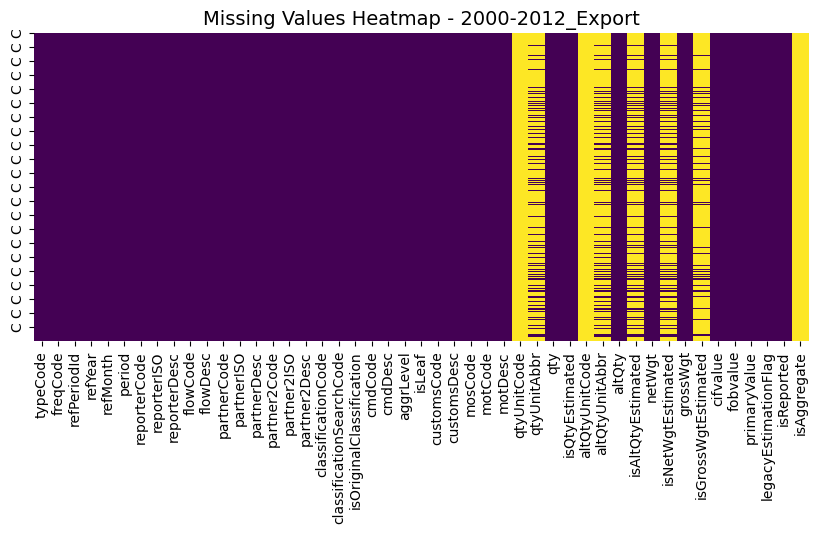

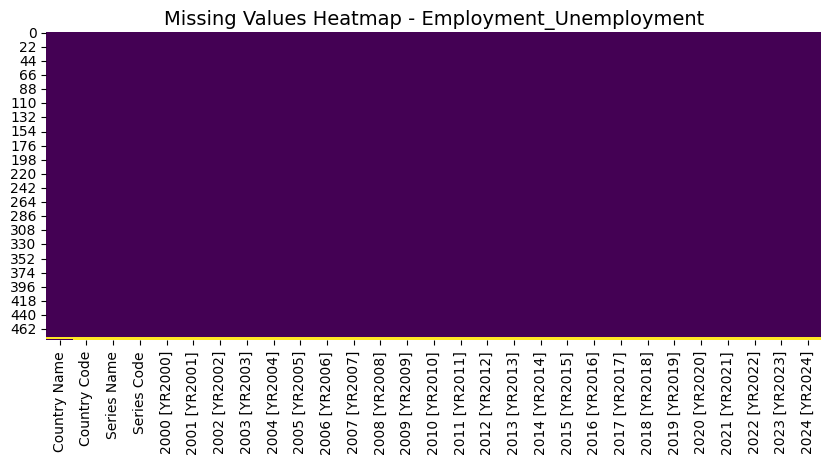

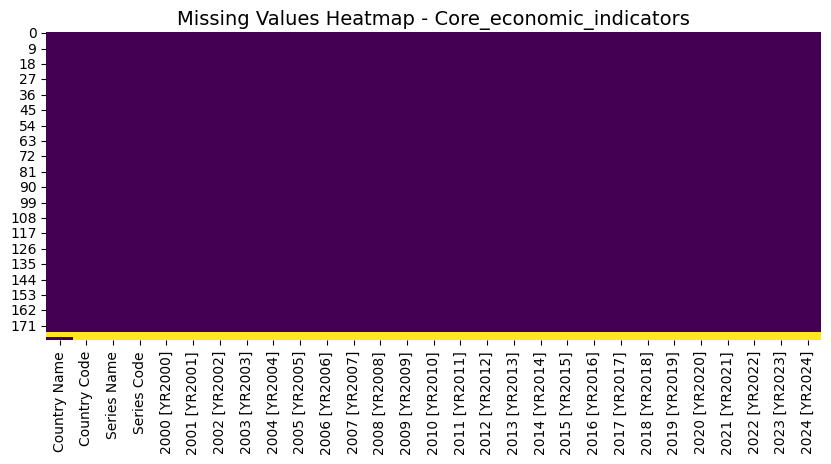

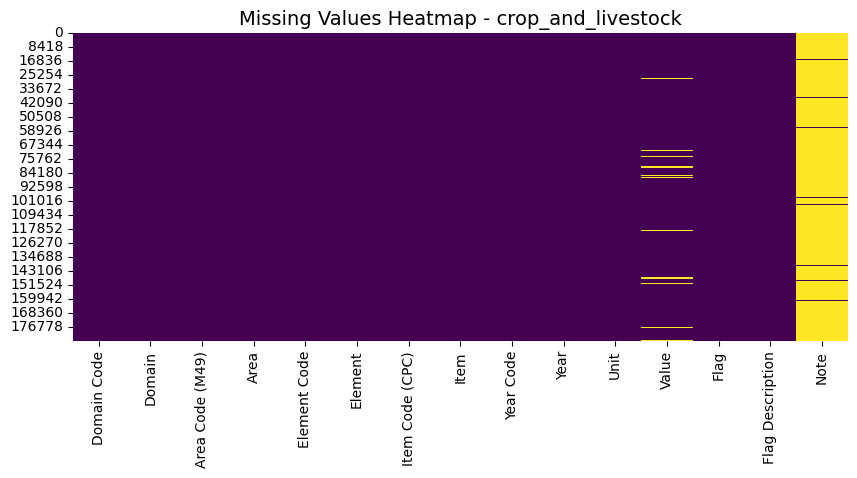

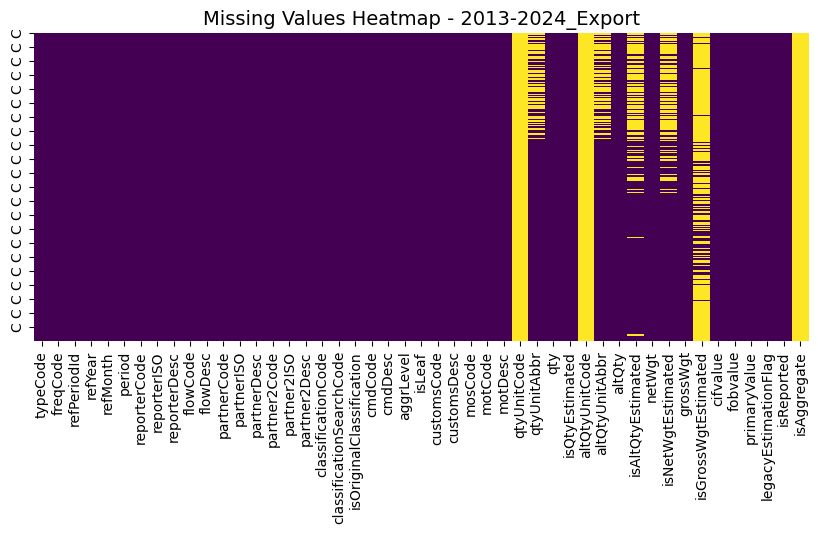

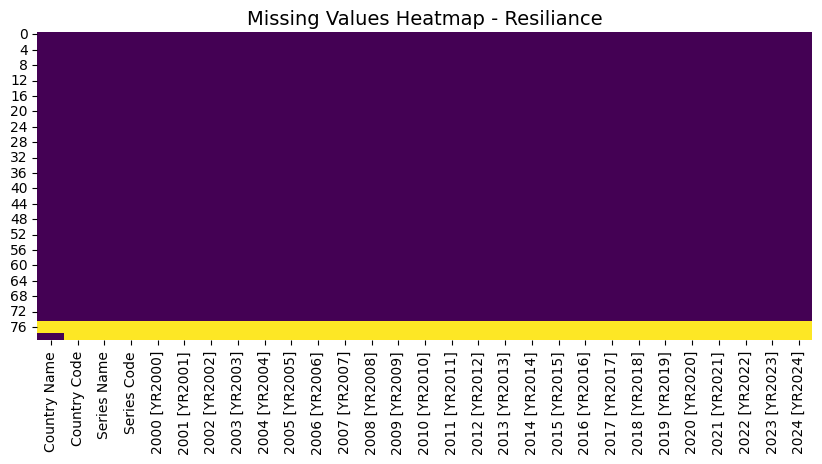

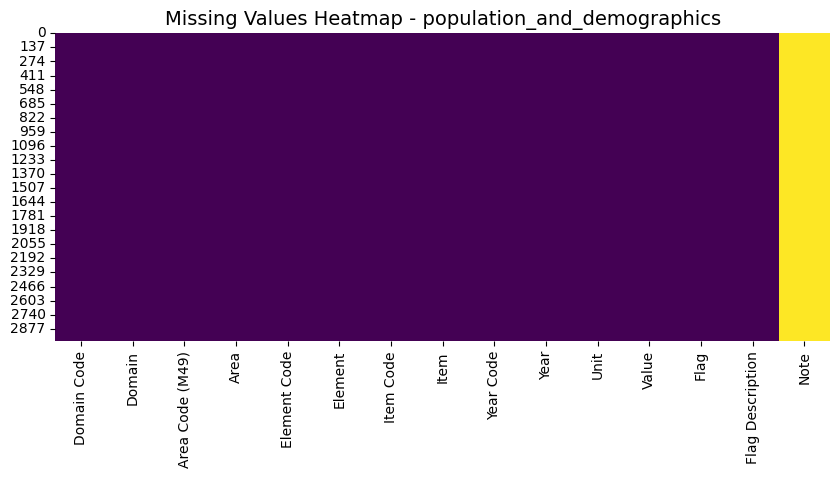

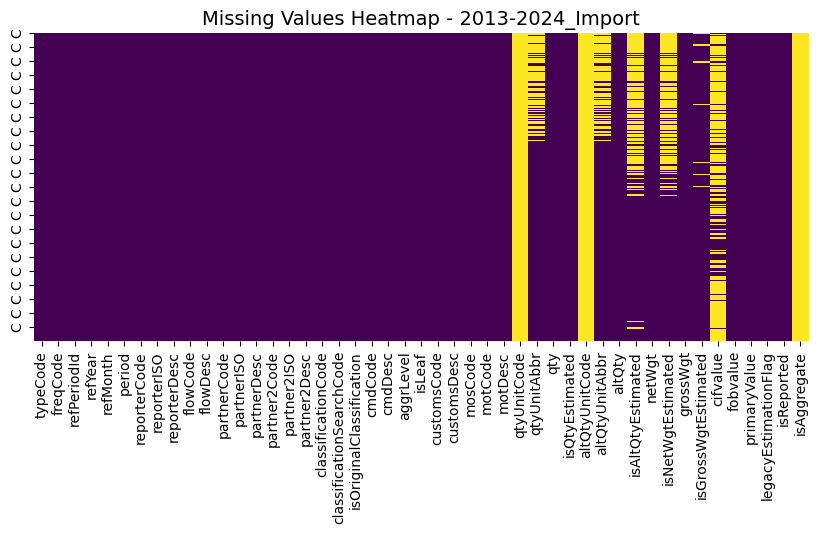

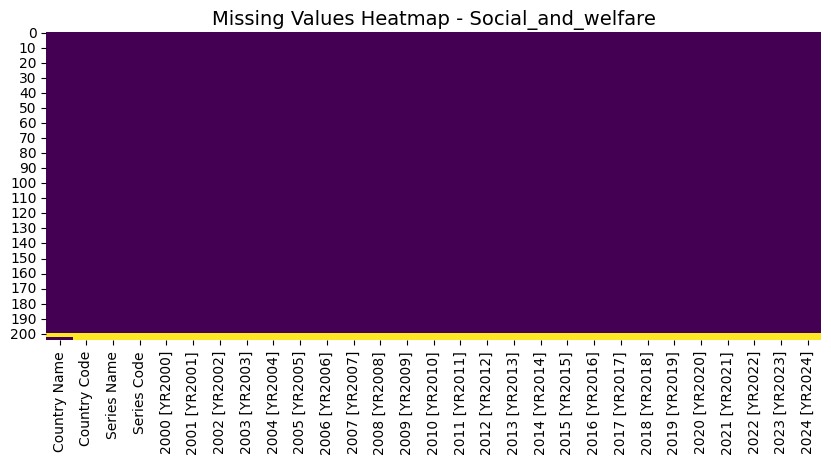

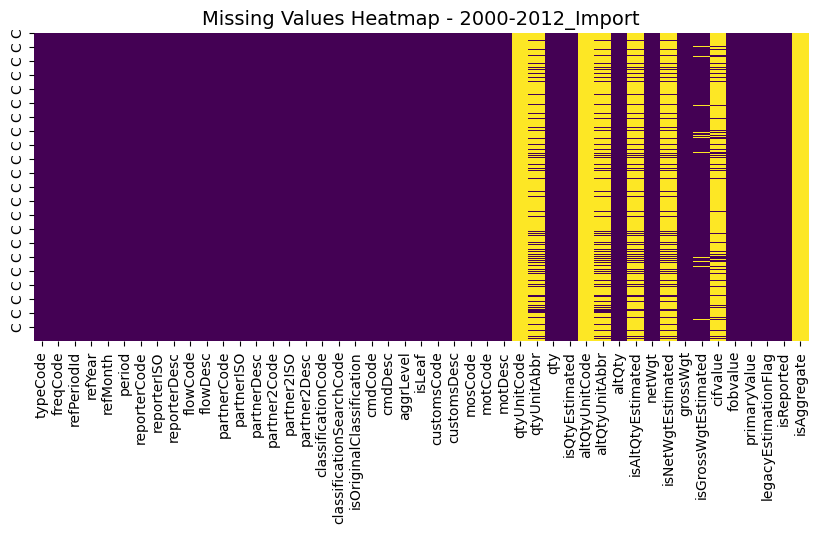

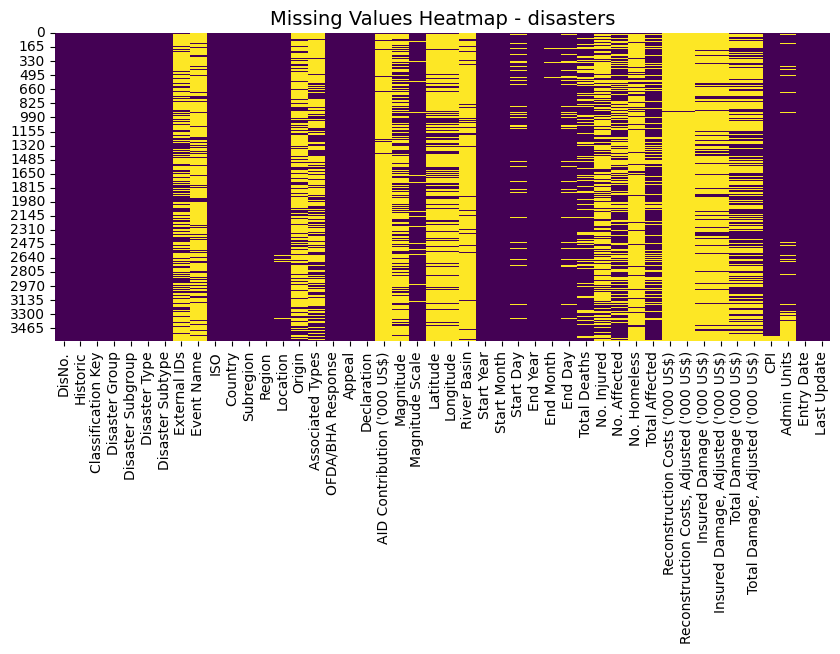

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 3: Missing value visualization
for name, df in dataframes.items():
    plt.figure(figsize=(10, 4))
    sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
    plt.title(f"Missing Values Heatmap - {name}", fontsize=14)
    plt.show()


In [8]:
# Step 4: Cleaning missing values
cleaned_dataframes = {}

for name, df in dataframes.items():
    df_clean = df.copy()

    # Drop columns with more than 40% missing values
    threshold = len(df_clean) * 0.4
    df_clean = df_clean.dropna(axis=1, thresh=threshold)

    # Fill numeric missing values with median
    for col in df_clean.select_dtypes(include=['float64', 'int64']).columns:
        df_clean[col] = df_clean[col].fillna(df_clean[col].median())

    # Fill categorical missing values with mode
    for col in df_clean.select_dtypes(include=['object']).columns:
        if df_clean[col].isnull().sum() > 0:
            df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])

    cleaned_dataframes[name] = df_clean
    print(f"{name}: Cleaned shape {df_clean.shape}, Missing values left: {df_clean.isnull().sum().sum()}")


2000-2012_Export: Cleaned shape (41938, 39), Missing values left: 0
Employment_Unemployment: Cleaned shape (480, 29), Missing values left: 0
Core_economic_indicators: Cleaned shape (180, 29), Missing values left: 0
crop_and_livestock: Cleaned shape (185181, 14), Missing values left: 0
2013-2024_Export: Cleaned shape (41876, 43), Missing values left: 0
Resiliance: Cleaned shape (80, 29), Missing values left: 0
population_and_demographics: Cleaned shape (3000, 14), Missing values left: 0
2013-2024_Import: Cleaned shape (46311, 43), Missing values left: 0
Social_and_welfare: Cleaned shape (205, 29), Missing values left: 0
2000-2012_Import: Cleaned shape (47373, 39), Missing values left: 0
disasters: Cleaned shape (3613, 31), Missing values left: 0


In [9]:
# Step 5: Schema Alignment - Standardize column names
standardized_dataframes = {}

def clean_column_names(columns):
    return [c.strip().lower().replace(" ", "_").replace("-", "_") for c in columns]

for name, df in cleaned_dataframes.items():
    df_std = df.copy()
    df_std.columns = clean_column_names(df_std.columns)

    # Rename common columns if present
    rename_map = {
        "country_name": "country",
        "nation": "country",
        "iso_code": "country",
        "year_": "year",
        "time": "year",
        "value_": "value"
    }
    df_std.rename(columns={c: rename_map.get(c, c) for c in df_std.columns}, inplace=True)

    standardized_dataframes[name] = df_std
    print(f"{name}: Columns -> {df_std.columns.tolist()}")


2000-2012_Export: Columns -> ['typecode', 'freqcode', 'refperiodid', 'refyear', 'refmonth', 'period', 'reportercode', 'reporteriso', 'reporterdesc', 'flowcode', 'flowdesc', 'partnercode', 'partneriso', 'partnerdesc', 'partner2code', 'partner2iso', 'partner2desc', 'classificationcode', 'classificationsearchcode', 'isoriginalclassification', 'cmdcode', 'cmddesc', 'aggrlevel', 'isleaf', 'customscode', 'customsdesc', 'moscode', 'motcode', 'motdesc', 'qty', 'isqtyestimated', 'altqty', 'netwgt', 'grosswgt', 'cifvalue', 'fobvalue', 'primaryvalue', 'legacyestimationflag', 'isreported']
Employment_Unemployment: Columns -> ['country', 'country_code', 'series_name', 'series_code', '2000_[yr2000]', '2001_[yr2001]', '2002_[yr2002]', '2003_[yr2003]', '2004_[yr2004]', '2005_[yr2005]', '2006_[yr2006]', '2007_[yr2007]', '2008_[yr2008]', '2009_[yr2009]', '2010_[yr2010]', '2011_[yr2011]', '2012_[yr2012]', '2013_[yr2013]', '2014_[yr2014]', '2015_[yr2015]', '2016_[yr2016]', '2017_[yr2017]', '2018_[yr2018]'

In [10]:
# Step 6: Exploratory Data Analysis (EDA)

for name, df in standardized_dataframes.items():
    print("="*80)
    print(f"📊 Dataset: {name}")
    print("-"*80)
    print("Shape:", df.shape)
    print("\nColumns & Types:")
    print(df.dtypes)
    print("\nMissing Values:")
    print(df.isnull().sum())
    print("\nSummary Statistics (numeric columns):")
    print(df.describe(include='all').transpose().head(10))  # limit output
    print("\nSample Rows:")
    print(df.head(3))
    print("="*80, "\n")

📊 Dataset: 2000-2012_Export
--------------------------------------------------------------------------------
Shape: (41938, 39)

Columns & Types:
typecode                     object
freqcode                      int64
refperiodid                   int64
refyear                       int64
refmonth                      int64
period                        int64
reportercode                 object
reporteriso                  object
reporterdesc                 object
flowcode                     object
flowdesc                      int64
partnercode                  object
partneriso                   object
partnerdesc                   int64
partner2code                 object
partner2iso                  object
partner2desc                 object
classificationcode           object
classificationsearchcode       bool
isoriginalclassification     object
cmdcode                      object
cmddesc                       int64
aggrlevel                      bool
isleaf                    

In [11]:
# Step 7: Finding common keys across datasets

from collections import Counter

all_columns = []

for name, df in standardized_dataframes.items():
    all_columns.extend(df.columns.tolist())

# Count frequency of each column name across datasets
col_counter = Counter(all_columns)

print("📌 Column Frequency Across Datasets:")
for col, freq in col_counter.most_common():
    print(f"{col} -> {freq} datasets")

# Show potential keys
potential_keys = [col for col, freq in col_counter.items() if freq >= 2]
print("\n✅ Potential common keys for merging:", potential_keys)


📌 Column Frequency Across Datasets:
country -> 5 datasets
typecode -> 4 datasets
freqcode -> 4 datasets
refperiodid -> 4 datasets
refyear -> 4 datasets
refmonth -> 4 datasets
period -> 4 datasets
reportercode -> 4 datasets
reporteriso -> 4 datasets
reporterdesc -> 4 datasets
flowcode -> 4 datasets
flowdesc -> 4 datasets
partnercode -> 4 datasets
partneriso -> 4 datasets
partnerdesc -> 4 datasets
partner2code -> 4 datasets
partner2iso -> 4 datasets
partner2desc -> 4 datasets
classificationcode -> 4 datasets
classificationsearchcode -> 4 datasets
isoriginalclassification -> 4 datasets
cmdcode -> 4 datasets
cmddesc -> 4 datasets
aggrlevel -> 4 datasets
isleaf -> 4 datasets
customscode -> 4 datasets
customsdesc -> 4 datasets
moscode -> 4 datasets
motcode -> 4 datasets
motdesc -> 4 datasets
qty -> 4 datasets
isqtyestimated -> 4 datasets
altqty -> 4 datasets
netwgt -> 4 datasets
grosswgt -> 4 datasets
fobvalue -> 4 datasets
primaryvalue -> 4 datasets
legacyestimationflag -> 4 datasets
isrepo

In [12]:
# Step 8: Data Cleaning & Standardization

import numpy as np

cleaned_dataframes = {}

for name, df in standardized_dataframes.items():
    df = df.copy()

    # Standardize column names again (safety)
    df.columns = df.columns.str.strip().str.lower()

    # Handle missing values
    df.replace(["N/A", "NA", "-", "--", ""], np.nan, inplace=True)

    # Standardize Year column if exists
    if "year" in df.columns:
        df["year"] = pd.to_numeric(df["year"], errors="coerce")

    # Standardize Country column if exists
    if "country" in df.columns:
        df["country"] = df["country"].str.strip().str.title()  # e.g., "united states"

    # Drop duplicates
    df.drop_duplicates(inplace=True)

    cleaned_dataframes[name] = df

print("✅ Data cleaning & standardization completed.")


✅ Data cleaning & standardization completed.



📊 Dataset: 2000-2012_Export
Shape: (41938, 39)
Missing values per column:
 typecode                    0
freqcode                    0
refperiodid                 0
refyear                     0
refmonth                    0
period                      0
reportercode                0
reporteriso                 0
reporterdesc                0
flowcode                    0
flowdesc                    0
partnercode                 0
partneriso                  0
partnerdesc                 0
partner2code                0
partner2iso                 0
partner2desc                0
classificationcode          0
classificationsearchcode    0
isoriginalclassification    0
cmdcode                     0
cmddesc                     0
aggrlevel                   0
isleaf                      0
customscode                 0
customsdesc                 0
moscode                     0
motcode                     0
motdesc                     0
qty                         0
isqtyestimated          

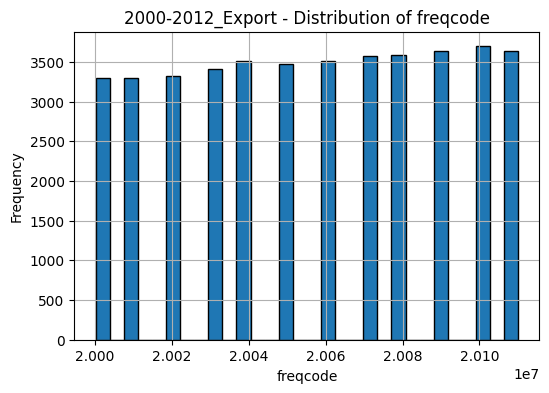

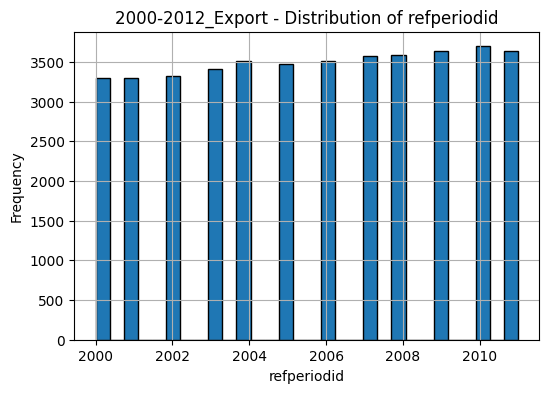

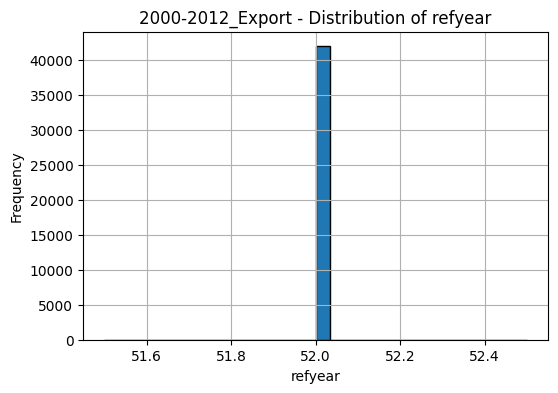


📊 Dataset: Employment_Unemployment
Shape: (478, 29)
Missing values per column:
 country          0
country_code     0
series_name      0
series_code      0
2000_[yr2000]    0
2001_[yr2001]    0
2002_[yr2002]    0
2003_[yr2003]    0
2004_[yr2004]    0
2005_[yr2005]    0
2006_[yr2006]    0
2007_[yr2007]    0
2008_[yr2008]    0
2009_[yr2009]    0
2010_[yr2010]    0
2011_[yr2011]    0
2012_[yr2012]    0
2013_[yr2013]    0
2014_[yr2014]    0
2015_[yr2015]    0
2016_[yr2016]    0
2017_[yr2017]    0
2018_[yr2018]    0
2019_[yr2019]    0
2020_[yr2020]    0
2021_[yr2021]    0
2022_[yr2022]    0
2023_[yr2023]    0
2024_[yr2024]    0
dtype: int64

Descriptive Statistics:
             country country_code  \
count           478          478   
unique           27           25   
top     Afghanistan          AFG   
freq             20           22   

                                              series_name  \
count                                                 478   
unique                    

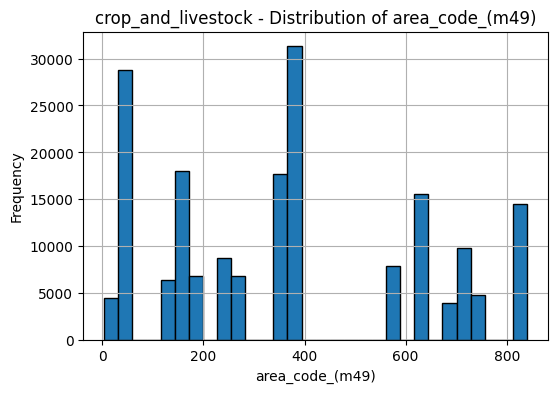

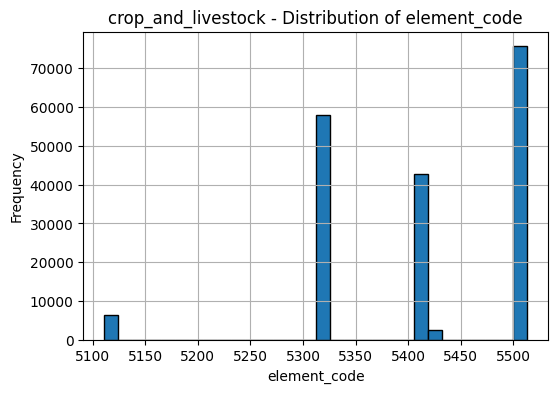

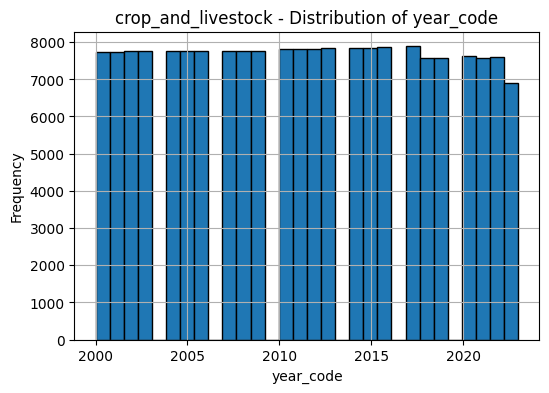

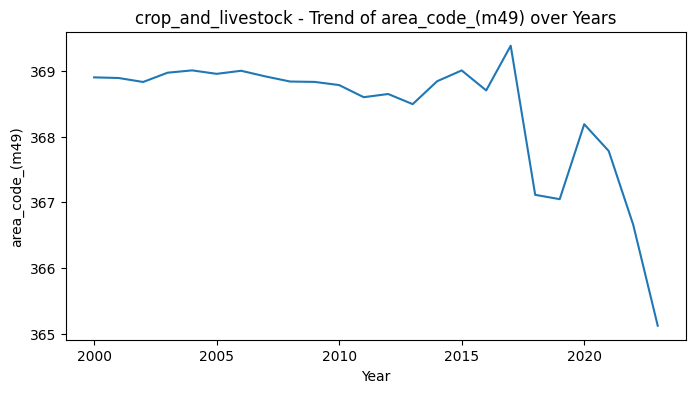


📊 Dataset: 2013-2024_Export
Shape: (41876, 43)
Missing values per column:
 typecode                    0
freqcode                    0
refperiodid                 0
refyear                     0
refmonth                    0
period                      0
reportercode                0
reporteriso                 0
reporterdesc                0
flowcode                    0
flowdesc                    0
partnercode                 0
partneriso                  0
partnerdesc                 0
partner2code                0
partner2iso                 0
partner2desc                0
classificationcode          0
classificationsearchcode    0
isoriginalclassification    0
cmdcode                     0
cmddesc                     0
aggrlevel                   0
isleaf                      0
customscode                 0
customsdesc                 0
moscode                     0
motcode                     0
motdesc                     0
qtyunitabbr                 0
qty                     

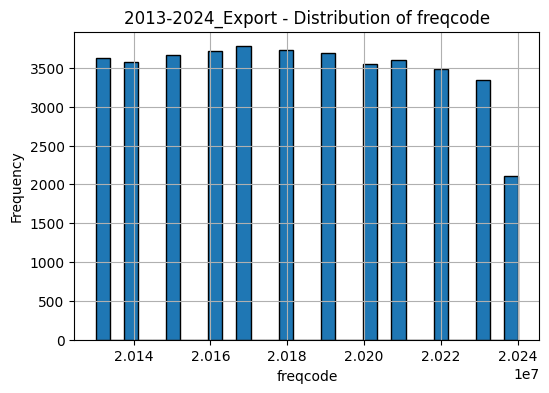

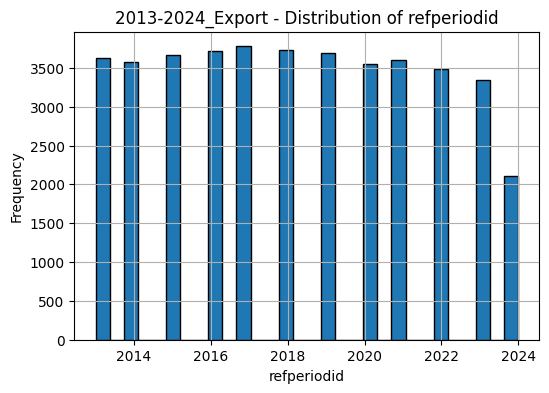

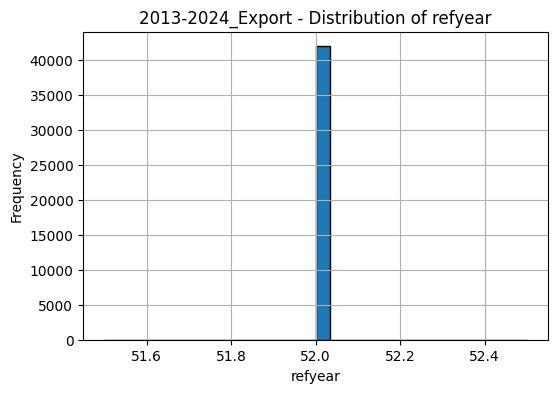


📊 Dataset: Resiliance
Shape: (78, 29)
Missing values per column:
 country          0
country_code     0
series_name      0
series_code      0
2000_[yr2000]    0
2001_[yr2001]    0
2002_[yr2002]    0
2003_[yr2003]    0
2004_[yr2004]    0
2005_[yr2005]    0
2006_[yr2006]    0
2007_[yr2007]    0
2008_[yr2008]    0
2009_[yr2009]    0
2010_[yr2010]    0
2011_[yr2011]    0
2012_[yr2012]    0
2013_[yr2013]    0
2014_[yr2014]    0
2015_[yr2015]    0
2016_[yr2016]    0
2017_[yr2017]    0
2018_[yr2018]    0
2019_[yr2019]    0
2020_[yr2020]    0
2021_[yr2021]    0
2022_[yr2022]    0
2023_[yr2023]    0
2024_[yr2024]    0
dtype: int64

Descriptive Statistics:
             country country_code                         series_name  \
count            78           78                                  78   
unique           27           25                                   3   
top     Afghanistan          AFG  Current account balance (% of GDP)   
freq              4            6                       

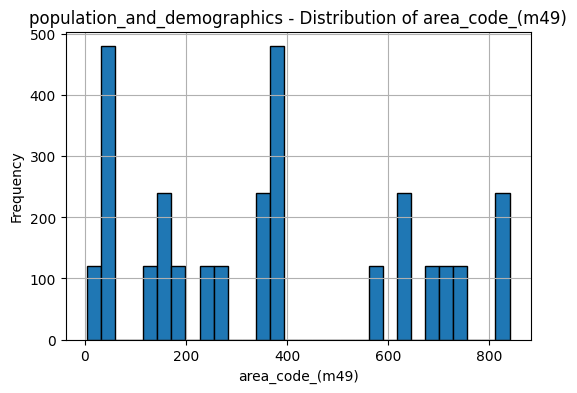

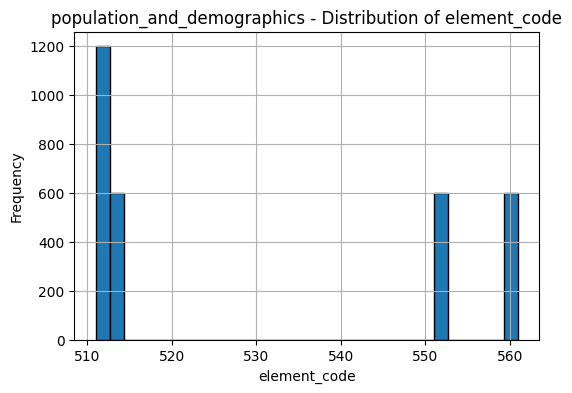

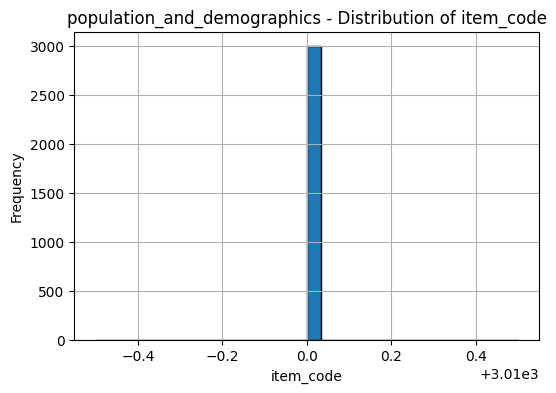

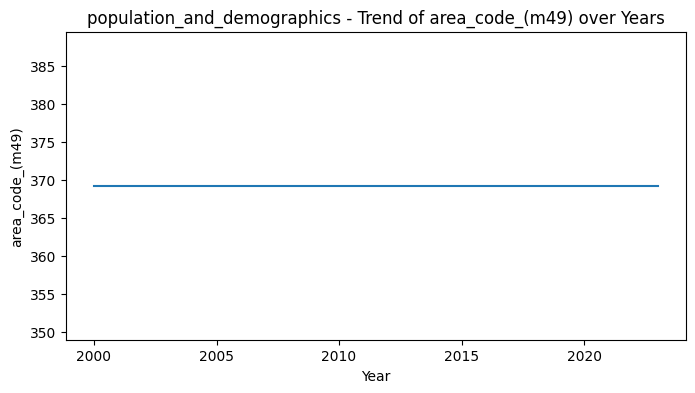


📊 Dataset: 2013-2024_Import
Shape: (46311, 43)
Missing values per column:
 typecode                    0
freqcode                    0
refperiodid                 0
refyear                     0
refmonth                    0
period                      0
reportercode                0
reporteriso                 0
reporterdesc                0
flowcode                    0
flowdesc                    0
partnercode                 0
partneriso                  0
partnerdesc                 0
partner2code                0
partner2iso                 0
partner2desc                0
classificationcode          0
classificationsearchcode    0
isoriginalclassification    0
cmdcode                     0
cmddesc                     0
aggrlevel                   0
isleaf                      0
customscode                 0
customsdesc                 0
moscode                     0
motcode                     0
motdesc                     0
qtyunitabbr                 0
qty                     

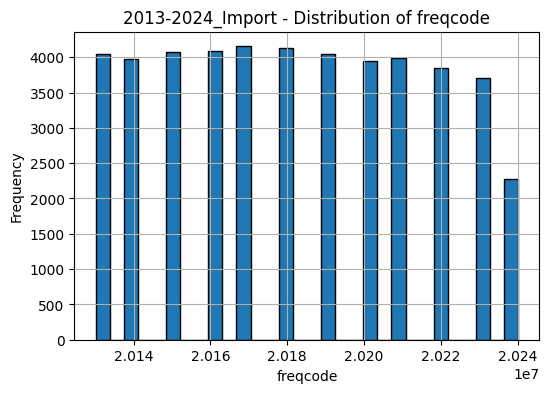

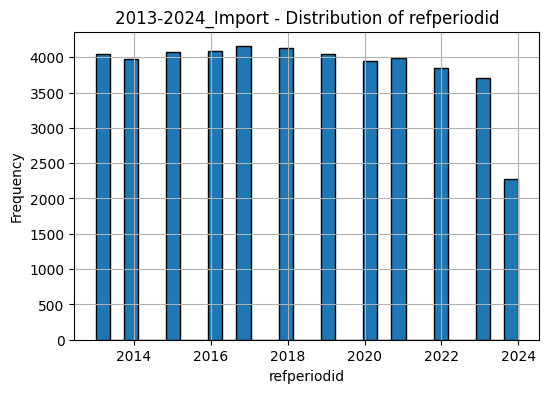

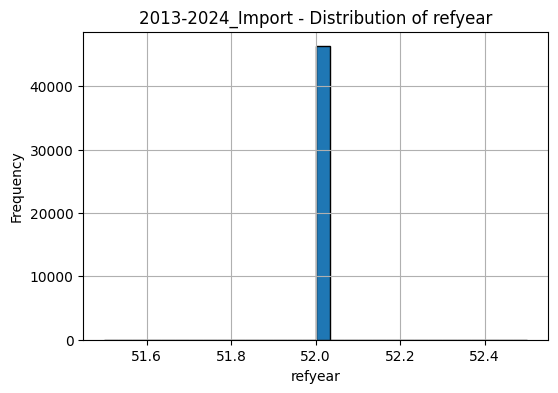


📊 Dataset: Social_and_welfare
Shape: (203, 29)
Missing values per column:
 country          0
country_code     0
series_name      0
series_code      0
2000_[yr2000]    0
2001_[yr2001]    0
2002_[yr2002]    0
2003_[yr2003]    0
2004_[yr2004]    0
2005_[yr2005]    0
2006_[yr2006]    0
2007_[yr2007]    0
2008_[yr2008]    0
2009_[yr2009]    0
2010_[yr2010]    0
2011_[yr2011]    0
2012_[yr2012]    0
2013_[yr2013]    0
2014_[yr2014]    0
2015_[yr2015]    0
2016_[yr2016]    0
2017_[yr2017]    0
2018_[yr2018]    0
2019_[yr2019]    0
2020_[yr2020]    0
2021_[yr2021]    0
2022_[yr2022]    0
2023_[yr2023]    0
2024_[yr2024]    0
dtype: int64

Descriptive Statistics:
             country country_code series_name  series_code 2000_[yr2000]  \
count           203          203         203          203           203   
unique           27           25           8            8           170   
top     Afghanistan          AFG  Gini index  SI.POV.DDAY            ..   
freq              9           11  

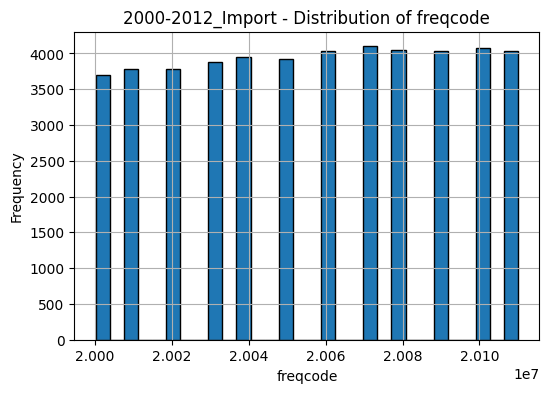

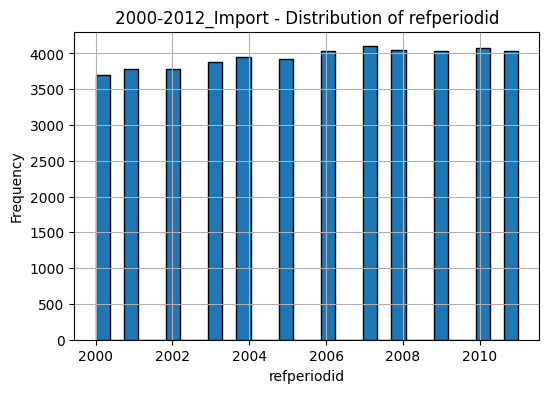

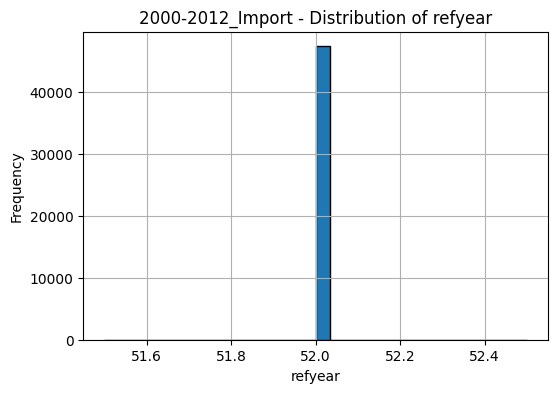


📊 Dataset: disasters
Shape: (3613, 31)
Missing values per column:
 disno.                               0
historic                             0
classification_key                   0
disaster_group                       0
disaster_subgroup                    0
disaster_type                        0
disaster_subtype                     0
iso                                  0
country                              0
subregion                            0
region                               0
location                             0
ofda/bha_response                    0
appeal                               0
declaration                          0
magnitude_scale                      0
start_year                           0
start_month                          0
start_day                            0
end_year                             0
end_month                            0
end_day                              0
total_deaths                         0
no._affected                       

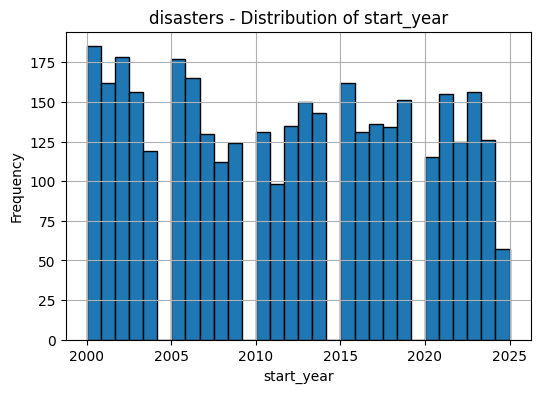

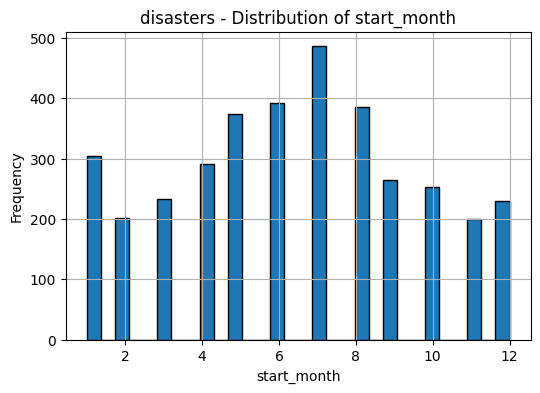

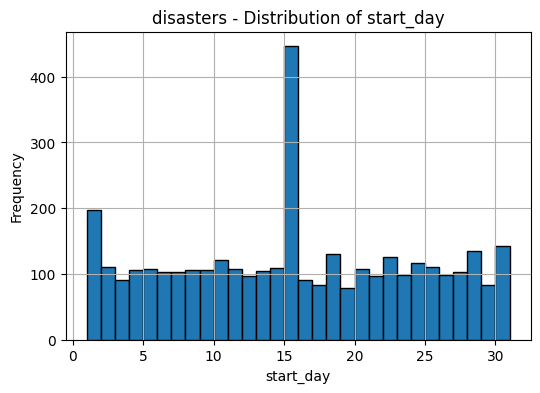

In [13]:
# Step 9: Exploratory Data Analysis (EDA)

import matplotlib.pyplot as plt

for name, df in cleaned_dataframes.items():
    print(f"\n📊 Dataset: {name}")
    print("Shape:", df.shape)
    print("Missing values per column:\n", df.isnull().sum())
    print("\nDescriptive Statistics:\n", df.describe(include="all"))

    # If numeric columns exist, plot distributions
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

    for col in numeric_cols[:3]:  # limit to first 3 numeric columns per dataset
        plt.figure(figsize=(6, 4))
        df[col].hist(bins=30, edgecolor='black')
        plt.title(f"{name} - Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.show()

    # If year and one numeric col exist, plot trend
    if "year" in df.columns and len(numeric_cols) > 0:
        plt.figure(figsize=(8, 4))
        df.groupby("year")[numeric_cols[0]].mean().plot()
        plt.title(f"{name} - Trend of {numeric_cols[0]} over Years")
        plt.xlabel("Year")
        plt.ylabel(numeric_cols[0])
        plt.show()



🔗 Correlation Analysis for: 2000-2012_Export
                freqcode  refperiodid  refyear  refmonth    period  flowdesc  \
freqcode        1.000000     1.000000      NaN  1.000000 -0.017841 -0.006686   
refperiodid     1.000000     1.000000      NaN  1.000000 -0.017841 -0.006686   
refyear              NaN          NaN      NaN       NaN       NaN       NaN   
refmonth        1.000000     1.000000      NaN  1.000000 -0.017841 -0.006686   
period         -0.017841    -0.017841      NaN -0.017841  1.000000 -0.012028   
flowdesc       -0.006686    -0.006686      NaN -0.006686 -0.012028  1.000000   
partnerdesc          NaN          NaN      NaN       NaN       NaN       NaN   
cmddesc              NaN          NaN      NaN       NaN       NaN       NaN   
customsdesc          NaN          NaN      NaN       NaN       NaN       NaN   
moscode              NaN          NaN      NaN       NaN       NaN       NaN   
motdesc              NaN          NaN      NaN       NaN       NaN       N

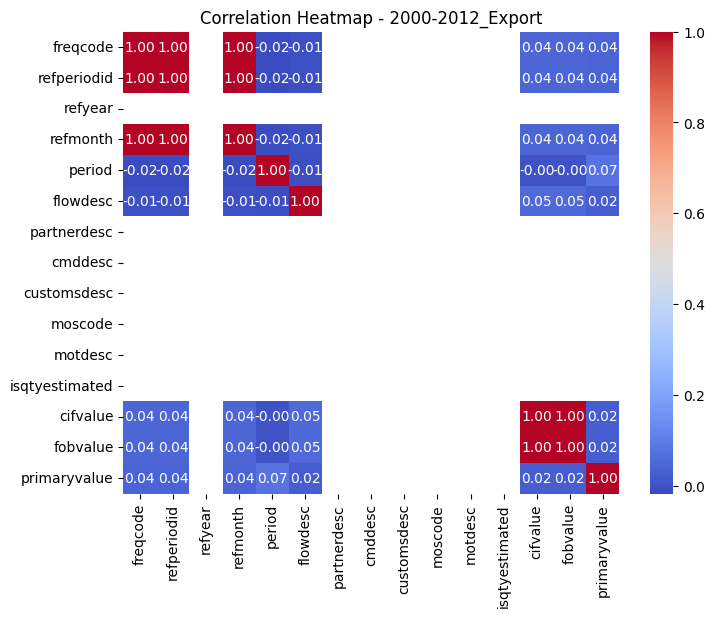


🔗 Correlation Analysis for: Employment_Unemployment

🔗 Correlation Analysis for: Core_economic_indicators

🔗 Correlation Analysis for: crop_and_livestock
                 area_code_(m49)  element_code  year_code      year     value
area_code_(m49)         1.000000      0.003914  -0.002462 -0.002462 -0.015083
element_code            0.003914      1.000000  -0.006161 -0.006161 -0.052128
year_code              -0.002462     -0.006161   1.000000  1.000000  0.012504
year                   -0.002462     -0.006161   1.000000  1.000000  0.012504
value                  -0.015083     -0.052128   0.012504  0.012504  1.000000


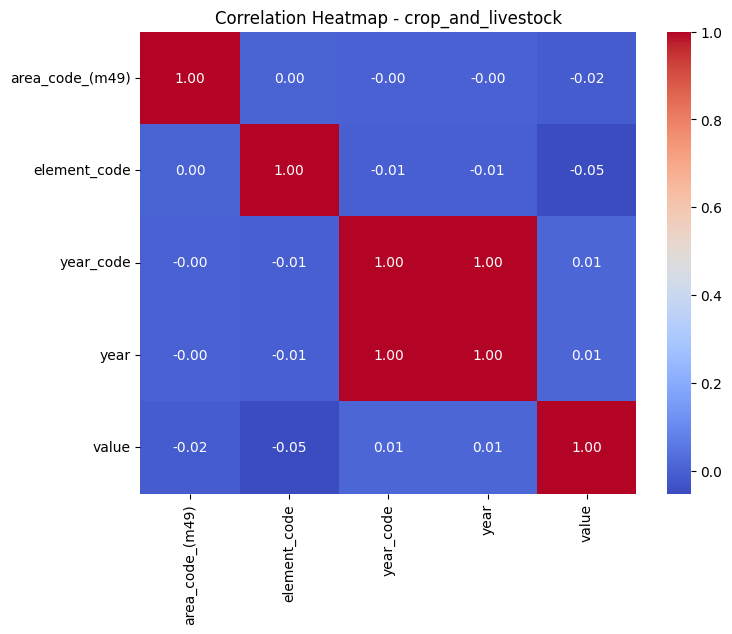


🔗 Correlation Analysis for: 2013-2024_Export
                   freqcode  refperiodid  refyear  refmonth    period  \
freqcode           1.000000     1.000000      NaN  1.000000  0.005981   
refperiodid        1.000000     1.000000      NaN  1.000000  0.005981   
refyear                 NaN          NaN      NaN       NaN       NaN   
refmonth           1.000000     1.000000      NaN  1.000000  0.005981   
period             0.005981     0.005981      NaN  0.005981  1.000000   
flowdesc          -0.002696    -0.002696      NaN -0.002696 -0.011012   
partnerdesc             NaN          NaN      NaN       NaN       NaN   
cmddesc                 NaN          NaN      NaN       NaN       NaN   
customsdesc             NaN          NaN      NaN       NaN       NaN   
moscode                 NaN          NaN      NaN       NaN       NaN   
motdesc                 NaN          NaN      NaN       NaN       NaN   
qtyunitabbr             NaN          NaN      NaN       NaN       NaN   
isqty

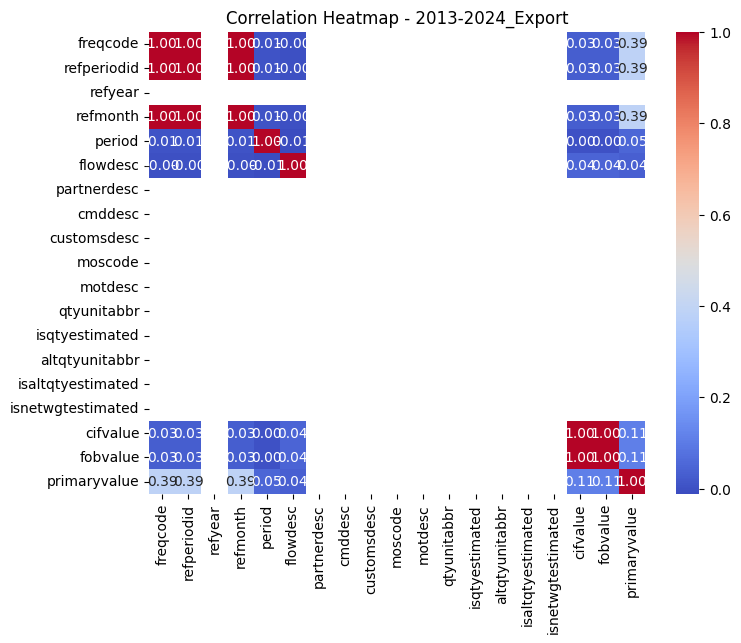


🔗 Correlation Analysis for: Resiliance

🔗 Correlation Analysis for: population_and_demographics
                 area_code_(m49)  element_code  item_code     year_code  \
area_code_(m49)     1.000000e+00 -6.976421e-14        NaN  7.392698e-14   
element_code       -6.976421e-14  1.000000e+00        NaN -2.981099e-15   
item_code                    NaN           NaN        NaN           NaN   
year_code           7.392698e-14 -2.981099e-15        NaN  1.000000e+00   
year                7.392698e-14 -2.981099e-15        NaN  1.000000e+00   
value              -5.273106e-02 -6.437506e-02        NaN  2.805285e-02   

                         year     value  
area_code_(m49)  7.392698e-14 -0.052731  
element_code    -2.981099e-15 -0.064375  
item_code                 NaN       NaN  
year_code        1.000000e+00  0.028053  
year             1.000000e+00  0.028053  
value            2.805285e-02  1.000000  


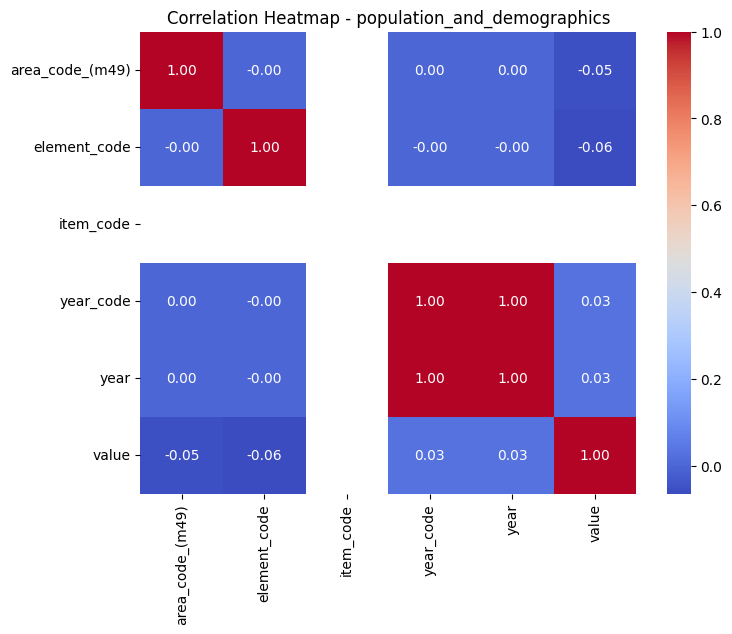


🔗 Correlation Analysis for: 2013-2024_Import
                     freqcode  refperiodid  refyear  refmonth    period  \
freqcode             1.000000     1.000000      NaN  1.000000 -0.000660   
refperiodid          1.000000     1.000000      NaN  1.000000 -0.000660   
refyear                   NaN          NaN      NaN       NaN       NaN   
refmonth             1.000000     1.000000      NaN  1.000000 -0.000660   
period              -0.000660    -0.000660      NaN -0.000660  1.000000   
flowdesc            -0.004037    -0.004037      NaN -0.004037 -0.003881   
partnerdesc               NaN          NaN      NaN       NaN       NaN   
cmddesc                   NaN          NaN      NaN       NaN       NaN   
customsdesc               NaN          NaN      NaN       NaN       NaN   
moscode                   NaN          NaN      NaN       NaN       NaN   
motdesc                   NaN          NaN      NaN       NaN       NaN   
qtyunitabbr               NaN          NaN      NaN   

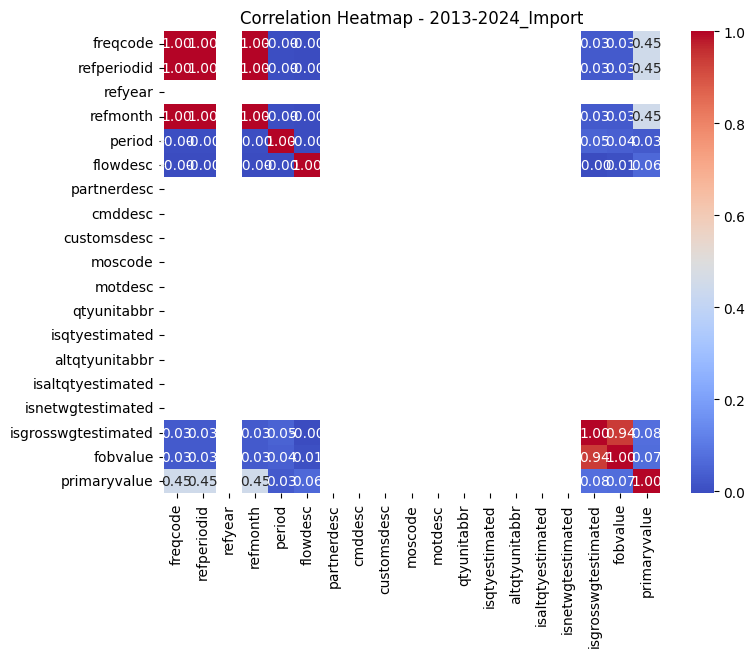


🔗 Correlation Analysis for: Social_and_welfare

🔗 Correlation Analysis for: 2000-2012_Import
                     freqcode  refperiodid  refyear  refmonth    period  \
freqcode             1.000000     1.000000      NaN  1.000000 -0.022149   
refperiodid          1.000000     1.000000      NaN  1.000000 -0.022149   
refyear                   NaN          NaN      NaN       NaN       NaN   
refmonth             1.000000     1.000000      NaN  1.000000 -0.022149   
period              -0.022149    -0.022149      NaN -0.022149  1.000000   
flowdesc            -0.005337    -0.005337      NaN -0.005337 -0.001470   
partnerdesc               NaN          NaN      NaN       NaN       NaN   
cmddesc                   NaN          NaN      NaN       NaN       NaN   
customsdesc               NaN          NaN      NaN       NaN       NaN   
moscode                   NaN          NaN      NaN       NaN       NaN   
motdesc                   NaN          NaN      NaN       NaN       NaN   
isqtye

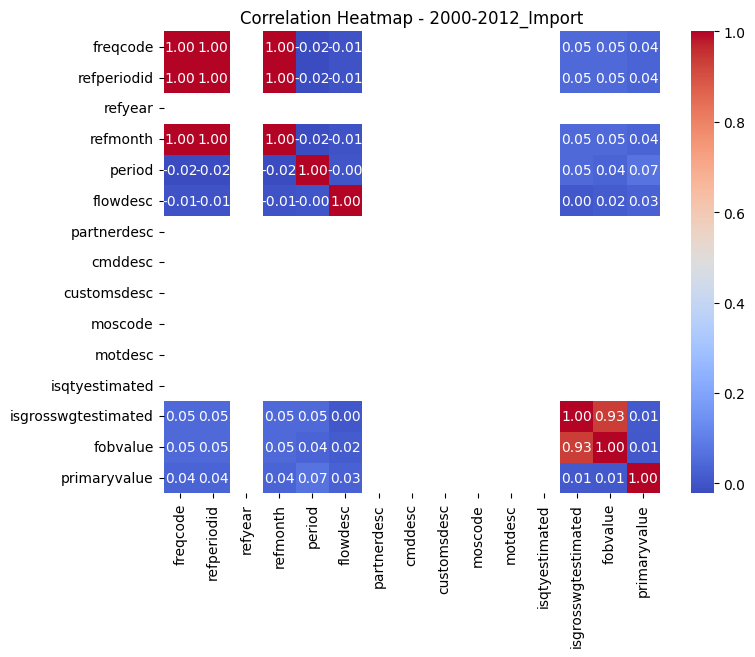


🔗 Correlation Analysis for: disasters
                                   start_year  start_month  start_day  \
start_year                           1.000000    -0.054383  -0.003752   
start_month                         -0.054383     1.000000  -0.003099   
start_day                           -0.003752    -0.003099   1.000000   
end_year                             0.999814    -0.052330  -0.003261   
end_month                           -0.018362     0.876643   0.000752   
end_day                             -0.015858    -0.027567   0.507496   
total_deaths                        -0.022504     0.015530   0.004627   
no._affected                        -0.038005    -0.029063   0.002757   
total_affected                      -0.038494    -0.028846   0.002850   
total_damage_('000_us$)              0.055291    -0.003530   0.016022   
total_damage,_adjusted_('000_us$)    0.030079     0.002983   0.018673   
cpi                                  0.954624    -0.038514  -0.005724   

           

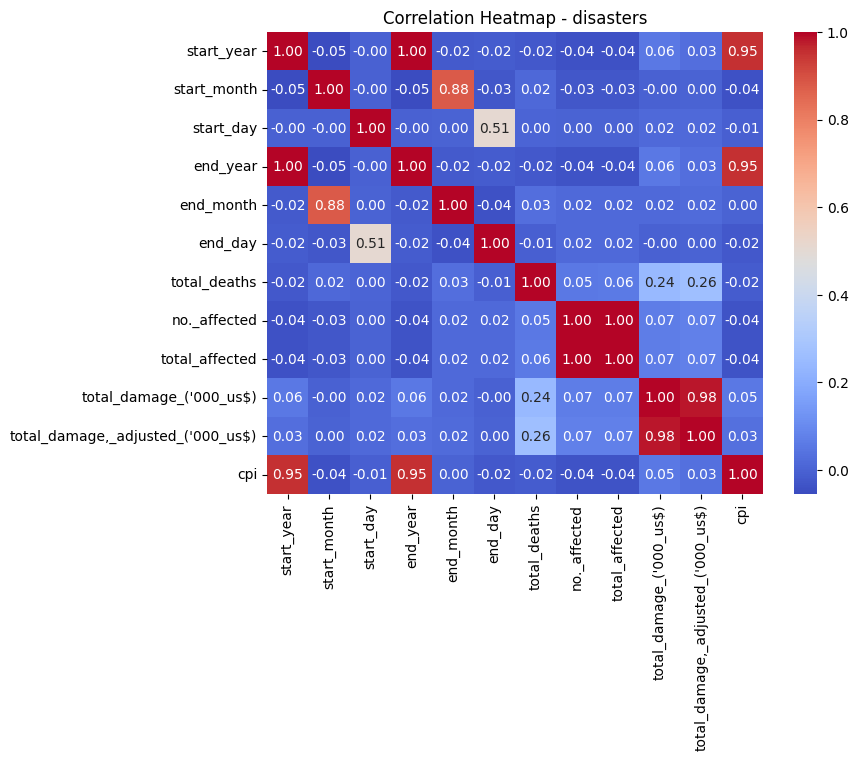

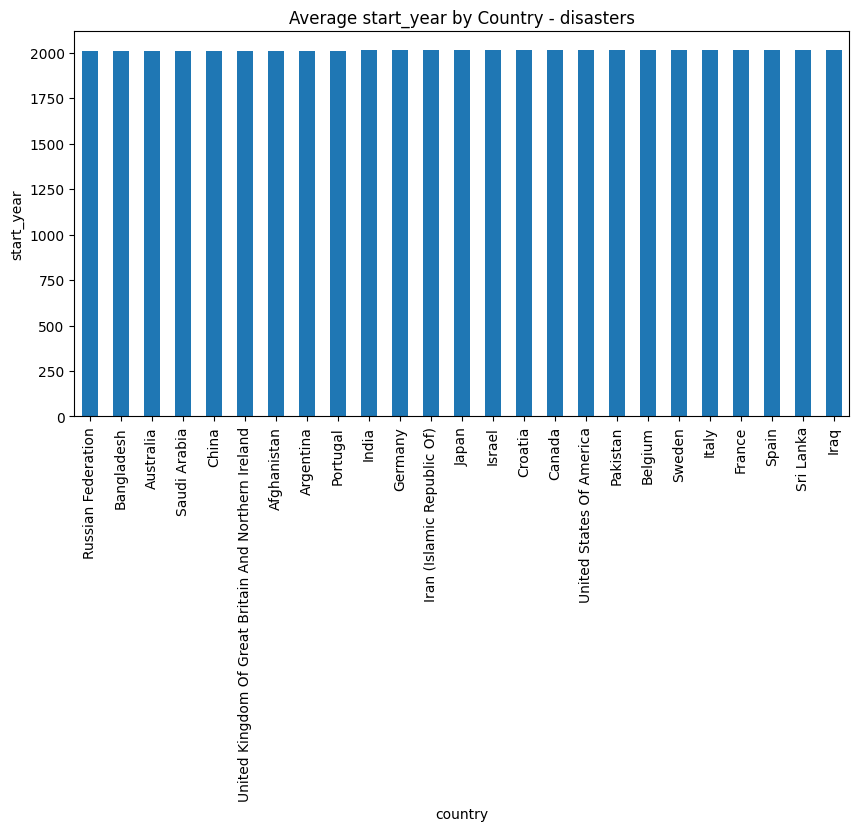

In [14]:
# Step 10: Correlation & Relationship Analysis

import seaborn as sns

for name, df in cleaned_dataframes.items():
    print(f"\n🔗 Correlation Analysis for: {name}")

    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

    if len(numeric_cols) > 1:
        corr = df[numeric_cols].corr()
        print(corr)

        # Heatmap
        plt.figure(figsize=(8, 6))
        sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
        plt.title(f"Correlation Heatmap - {name}")
        plt.show()

    # Example: Compare GDP or trade volume by country if available
    if "country" in df.columns and len(numeric_cols) > 0:
        plt.figure(figsize=(10, 5))
        df.groupby("country")[numeric_cols[0]].mean().sort_values().plot(kind="bar")
        plt.title(f"Average {numeric_cols[0]} by Country - {name}")
        plt.ylabel(numeric_cols[0])
        plt.show()


In [15]:
# Step 11: Feature Engineering

engineered_dataframes = {}

for name, df in cleaned_dataframes.items():
    df_fe = df.copy()

    # Ensure lowercase column names for easier handling
    cols = [c.lower() for c in df_fe.columns]
    df_fe.columns = cols

    # Feature 1: Trade Balance
    if "exports" in cols and "imports" in cols:
        df_fe["trade_balance"] = df_fe["exports"] - df_fe["imports"]
    else:
        print(f"Skipping 'trade_balance' for {name}: 'exports' or 'imports' not found.")

    # Feature 2: Trade Openness
    if "gdp" in cols and "exports" in cols and "imports" in cols:
        df_fe["trade_openness"] = (df_fe["exports"] + df_fe["imports"]) / df_fe["gdp"]
    else:
        print(f"Skipping 'trade_openness' for {name}: 'gdp', 'exports', or 'imports' not found.")

    # Feature 3: Export-to-GDP Ratio
    if "gdp" in cols and "exports" in cols:
        df_fe["export_gdp_ratio"] = df_fe["exports"] / df_fe["gdp"]
    else:
        print(f"Skipping 'export_gdp_ratio' for {name}: 'gdp' or 'exports' not found.")

    # Feature 4: Import-to-GDP Ratio
    if "gdp" in cols and "imports" in cols:
        df_fe["import_gdp_ratio"] = df_fe["imports"] / df_fe["gdp"]
    else:
        print(f"Skipping 'import_gdp_ratio' for {name}: 'gdp' or 'imports' not found.")

    # Feature 5: Year-on-Year Growth Rates (if 'year' column exists)
    if "year" in cols:
        df_fe = df_fe.sort_values("year")
        for col in ["gdp", "exports", "imports"]:
            if col in df_fe.columns:
                df_fe[f"{col}_growth"] = df_fe[col].pct_change()
            else:
                print(f"Skipping '{col}_growth' for {name}: '{col}' not found.")

    engineered_dataframes[name] = df_fe
    print(f"\n✨ Engineered features added for {name}: {df_fe.columns.tolist()}")
    display(df_fe.head())


✨ Engineered features added for 2000-2012_Export: ['typecode', 'freqcode', 'refperiodid', 'refyear', 'refmonth', 'period', 'reportercode', 'reporteriso', 'reporterdesc', 'flowcode', 'flowdesc', 'partnercode', 'partneriso', 'partnerdesc', 'partner2code', 'partner2iso', 'partner2desc', 'classificationcode', 'classificationsearchcode', 'isoriginalclassification', 'cmdcode', 'cmddesc', 'aggrlevel', 'isleaf', 'customscode', 'customsdesc', 'moscode', 'motcode', 'motdesc', 'qty', 'isqtyestimated', 'altqty', 'netwgt', 'grosswgt', 'cifvalue', 'fobvalue', 'primaryvalue', 'legacyestimationflag', 'isreported']


,typecode,freqcode,refperiodid,refyear,refmonth,period,reportercode,reporteriso,reporterdesc,flowcode,flowdesc,partnercode,partneriso,partnerdesc,partner2code,partner2iso,partner2desc,classificationcode,classificationsearchcode,isoriginalclassification,cmdcode,cmddesc,aggrlevel,isleaf,customscode,customsdesc,moscode,motcode,motdesc,qty,isqtyestimated,altqty,netwgt,grosswgt,cifvalue,fobvalue,primaryvalue,legacyestimationflag,isreported
C,A,20000101,2000,52,2000,8,ALB,Albania,X,Export,4,AFG,Afghanistan,0,W00,World,H1,HS,True,TOTAL,All Commodities,0,False,C00,TOTAL CPC,0,0,TOTAL MOT,-1,False,-1,False,False,False,209.0,209.0,0,False,False
C,A,20000101,2000,52,2000,8,ALB,Albania,X,Export,36,AUS,Australia,0,W00,World,H1,HS,True,TOTAL,All Commodities,0,False,C00,TOTAL CPC,0,0,TOTAL MOT,-1,False,-1,False,False,False,22288.0,22288.0,0,False,False
C,A,20000101,2000,52,2000,8,ALB,Albania,X,Export,56,BEL,Belgium,0,W00,World,H1,HS,True,TOTAL,All Commodities,0,False,C00,TOTAL CPC,0,0,TOTAL MOT,-1,False,-1,False,False,False,266645.0,266645.0,0,False,False
C,A,20000101,2000,52,2000,8,ALB,Albania,X,Export,124,CAN,Canada,0,W00,World,H1,HS,True,TOTAL,All Commodities,0,False,C00,TOTAL CPC,0,0,TOTAL MOT,-1,False,-1,False,False,False,390.0,390.0,0,False,False
C,A,20000101,2000,52,2000,8,ALB,Albania,X,Export,156,CHN,China,0,W00,World,H1,HS,True,TOTAL,All Commodities,0,False,C00,TOTAL CPC,0,0,TOTAL MOT,-1,False,-1,False,False,False,1013.0,1013.0,0,False,False



✨ Engineered features added for Employment_Unemployment: ['country', 'country_code', 'series_name', 'series_code', '2000_[yr2000]', '2001_[yr2001]', '2002_[yr2002]', '2003_[yr2003]', '2004_[yr2004]', '2005_[yr2005]', '2006_[yr2006]', '2007_[yr2007]', '2008_[yr2008]', '2009_[yr2009]', '2010_[yr2010]', '2011_[yr2011]', '2012_[yr2012]', '2013_[yr2013]', '2014_[yr2014]', '2015_[yr2015]', '2016_[yr2016]', '2017_[yr2017]', '2018_[yr2018]', '2019_[yr2019]', '2020_[yr2020]', '2021_[yr2021]', '2022_[yr2022]', '2023_[yr2023]', '2024_[yr2024]']


,country,country_code,series_name,series_code,2000_[yr2000],2001_[yr2001],2002_[yr2002],2003_[yr2003],2004_[yr2004],2005_[yr2005],2006_[yr2006],2007_[yr2007],2008_[yr2008],2009_[yr2009],2010_[yr2010],2011_[yr2011],2012_[yr2012],2013_[yr2013],2014_[yr2014],2015_[yr2015],2016_[yr2016],2017_[yr2017],2018_[yr2018],2019_[yr2019],2020_[yr2020],2021_[yr2021],2022_[yr2022],2023_[yr2023],2024_[yr2024]
0,India,IND,"Unemployment with advanced education, male (% ...",SL.UEM.ADVN.MA.ZS,8.389,..,..,..,..,7.009,..,..,..,..,5.605,..,6.372,..,..,..,..,..,14.039,13.56,15.269,13.5,12.052,10.839,..
1,India,IND,"Unemployment with advanced education, female (...",SL.UEM.ADVN.FE.ZS,21.12,..,..,..,..,20.829,..,..,..,..,16.039,..,15.305,..,..,..,..,..,25.439,22.577,26.785,23.395,21.424,20.594,..
2,India,IND,Unemployment with basic education (% of total ...,SL.UEM.BASC.ZS,3.941,..,..,..,..,4.124,..,..,..,..,3.035,..,2.954,..,..,..,..,..,6.394,4.937,6.368,4.877,3.095,2.473,..
3,India,IND,"Unemployment with basic education, female (% o...",SL.UEM.BASC.FE.ZS,6.143,..,..,..,..,5.37,..,..,..,..,4.162,..,3.834,..,..,..,..,..,4.627,3.681,3.947,2.856,1.799,1.697,..
4,India,IND,"Unemployment with basic education, male (% of ...",SL.UEM.BASC.MA.ZS,3.6,..,..,..,..,3.836,..,..,..,..,2.796,..,2.765,..,..,..,..,..,6.714,5.21,6.951,5.382,3.449,2.748,..



✨ Engineered features added for Core_economic_indicators: ['country', 'country_code', 'series_name', 'series_code', '2000_[yr2000]', '2001_[yr2001]', '2002_[yr2002]', '2003_[yr2003]', '2004_[yr2004]', '2005_[yr2005]', '2006_[yr2006]', '2007_[yr2007]', '2008_[yr2008]', '2009_[yr2009]', '2010_[yr2010]', '2011_[yr2011]', '2012_[yr2012]', '2013_[yr2013]', '2014_[yr2014]', '2015_[yr2015]', '2016_[yr2016]', '2017_[yr2017]', '2018_[yr2018]', '2019_[yr2019]', '2020_[yr2020]', '2021_[yr2021]', '2022_[yr2022]', '2023_[yr2023]', '2024_[yr2024]']


,country,country_code,series_name,series_code,2000_[yr2000],2001_[yr2001],2002_[yr2002],2003_[yr2003],2004_[yr2004],2005_[yr2005],2006_[yr2006],2007_[yr2007],2008_[yr2008],2009_[yr2009],2010_[yr2010],2011_[yr2011],2012_[yr2012],2013_[yr2013],2014_[yr2014],2015_[yr2015],2016_[yr2016],2017_[yr2017],2018_[yr2018],2019_[yr2019],2020_[yr2020],2021_[yr2021],2022_[yr2022],2023_[yr2023],2024_[yr2024]
0,India,IND,Imports of goods and services (% of GDP),NE.IMP.GNFS.ZS,13.9036865990995,13.4348751195257,15.2442790107467,15.6445222747346,19.6446890963991,22.3964229200356,24.4565390770687,24.8865689304448,29.2708631790835,25.8723502685274,26.8542732486216,31.0834686939585,31.2592910673332,28.4132706461587,25.9542227389497,22.1097247094602,20.9242508026814,21.9507321152243,23.6891407335327,21.2411386333872,19.0756283996012,24.0239304534931,26.8237289453584,23.544144504402,23.4929703141577
1,India,IND,Exports of goods and services (% of GDP),NE.EXP.GNFS.ZS,12.9972363113479,12.5583796339108,14.2643839243147,14.9479138581734,17.8591249630479,19.6052466948335,21.2679414221966,20.7996997489032,24.0973572601391,20.4005193743564,22.4009332487945,24.5404113195713,24.534430661418,25.430861300519,22.9679630081172,19.8131891564045,19.1582349105946,18.7917648392982,19.9278285988562,18.664264897257,18.6824769296756,21.3991583305515,23.2515412045298,21.4486977833541,21.1781223210845
2,India,IND,Trade (% of GDP),NE.TRD.GNFS.ZS,26.9009229104474,25.9932547534365,29.5086629350614,30.592436132908,37.503814059447,42.0016696148691,45.7244804992652,45.686268679348,53.3682204392226,46.2728696428837,49.2552064974161,55.6238800135298,55.7937217287511,53.8441319466777,48.9221857470669,41.9229138658647,40.082485713276,40.7424969545225,43.6169693323889,39.9054035306442,37.7581053292768,45.4230887840446,50.0752701498882,44.9928422877561,44.6710926352422
3,India,IND,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,4.0094359104519,3.77929312235637,4.29715203929563,3.80585899528851,3.76725173477515,4.24634362031922,5.79652337561634,6.37288135593231,8.34926704907581,10.8823529411764,11.9893899204244,8.91179336483371,9.47899691419801,10.0178784746102,6.66565671867899,4.90697344127256,4.94821634062141,3.32817337461298,3.9388264669163,3.72950573539129,6.62343677628535,5.13140747176369,6.69903414079852,5.64914318907925,4.95303550973656
4,India,IND,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,3.84099115659129,4.82396626555771,3.80397532112175,7.8603814759073,7.92293661199932,7.92343062148318,8.06073257166651,7.6608150670107,3.08669805921981,7.86188883286074,8.49758470221235,5.24131619937695,5.45638755166587,6.38610640094825,7.41022760508854,7.99625378571471,8.25630550179086,6.79538341897911,6.45385134497769,3.87143694070356,-5.77772470686801,9.68959249192875,7.60936497768895,9.19075493028345,6.48422363033757



✨ Engineered features added for crop_and_livestock: ['domain_code', 'domain', 'area_code_(m49)', 'area', 'element_code', 'element', 'item_code_(cpc)', 'item', 'year_code', 'year', 'unit', 'value', 'flag', 'flag_description']


,domain_code,domain,area_code_(m49),area,element_code,element,item_code_(cpc),item,year_code,year,unit,value,flag,flag_description
73,QCL,Crops and livestock products,4,Afghanistan,5412,Yield,01654,"Anise, badian, coriander, cumin, caraway, fenn...",2000,2000,kg/ha,625.0,E,Estimated value
54302,QCL,Crops and livestock products,191,Croatia,5312,Area harvested,01449.02,Hempseed,2000,2000,ha,17881.0,M,"Missing value (data cannot exist, not applicable)"
54303,QCL,Crops and livestock products,191,Croatia,5510,Production,01449.02,Hempseed,2000,2000,t,17881.0,M,"Missing value (data cannot exist, not applicable)"
152701,QCL,Crops and livestock products,724,Spain,5510,Production,01610,"Coffee, green",2000,2000,t,17881.0,M,"Missing value (data cannot exist, not applicable)"
54338,QCL,Crops and livestock products,191,Croatia,5413,Yield,0231,"Hen eggs in shell, fresh",2000,2000,No/An,136.0,A,Official figure



✨ Engineered features added for 2013-2024_Export: ['typecode', 'freqcode', 'refperiodid', 'refyear', 'refmonth', 'period', 'reportercode', 'reporteriso', 'reporterdesc', 'flowcode', 'flowdesc', 'partnercode', 'partneriso', 'partnerdesc', 'partner2code', 'partner2iso', 'partner2desc', 'classificationcode', 'classificationsearchcode', 'isoriginalclassification', 'cmdcode', 'cmddesc', 'aggrlevel', 'isleaf', 'customscode', 'customsdesc', 'moscode', 'motcode', 'motdesc', 'qtyunitabbr', 'qty', 'isqtyestimated', 'altqtyunitabbr', 'altqty', 'isaltqtyestimated', 'netwgt', 'isnetwgtestimated', 'grosswgt', 'cifvalue', 'fobvalue', 'primaryvalue', 'legacyestimationflag', 'isreported']


,typecode,freqcode,refperiodid,refyear,refmonth,period,reportercode,reporteriso,reporterdesc,flowcode,flowdesc,partnercode,partneriso,partnerdesc,partner2code,partner2iso,partner2desc,classificationcode,classificationsearchcode,isoriginalclassification,cmdcode,cmddesc,aggrlevel,isleaf,customscode,customsdesc,moscode,motcode,motdesc,qtyunitabbr,qty,isqtyestimated,altqtyunitabbr,altqty,isaltqtyestimated,netwgt,isnetwgtestimated,grosswgt,cifvalue,fobvalue,primaryvalue,legacyestimationflag,isreported
C,A,20130101,2013,52,2013,8,ALB,Albania,X,Export,4,AFG,Afghanistan,0,W00,World,H4,HS,True,TOTAL,All Commodities,0,False,C00,TOTAL CPC,0,0,TOTAL MOT,-1,0.0,False,-1,0.0,False,0.0,False,0.0,False,2.780000e+02,2.780000e+02,0,True,False
C,A,20130101,2013,52,2013,31,AZE,Azerbaijan,X,Export,4,AFG,Afghanistan,0,W00,World,H4,HS,True,TOTAL,All Commodities,0,False,C00,TOTAL CPC,0,0,TOTAL MOT,-1,0.0,False,-1,0.0,False,0.0,False,0.0,False,2.053274e+08,2.053274e+08,0,True,False
C,A,20130101,2013,52,2013,32,ARG,Argentina,X,Export,4,AFG,Afghanistan,0,W00,World,H4,HS,True,TOTAL,All Commodities,0,False,C00,TOTAL CPC,0,0,TOTAL MOT,-1,0.0,False,-1,0.0,False,0.0,False,0.0,False,1.651710e+05,1.651710e+05,0,True,False
C,A,20130101,2013,52,2013,36,AUS,Australia,X,Export,4,AFG,Afghanistan,0,W00,World,H4,HS,True,TOTAL,All Commodities,0,False,C00,TOTAL CPC,0,0,TOTAL MOT,-1,0.0,False,-1,0.0,False,0.0,False,0.0,False,6.595278e+06,6.595278e+06,0,True,False
C,A,20130101,2013,52,2013,40,AUT,Austria,X,Export,4,AFG,Afghanistan,0,W00,World,H4,HS,True,TOTAL,All Commodities,0,False,C00,TOTAL CPC,0,0,TOTAL MOT,-1,0.0,False,-1,0.0,False,0.0,True,0.0,False,1.457359e+07,1.457359e+07,4,False,True



✨ Engineered features added for Resiliance: ['country', 'country_code', 'series_name', 'series_code', '2000_[yr2000]', '2001_[yr2001]', '2002_[yr2002]', '2003_[yr2003]', '2004_[yr2004]', '2005_[yr2005]', '2006_[yr2006]', '2007_[yr2007]', '2008_[yr2008]', '2009_[yr2009]', '2010_[yr2010]', '2011_[yr2011]', '2012_[yr2012]', '2013_[yr2013]', '2014_[yr2014]', '2015_[yr2015]', '2016_[yr2016]', '2017_[yr2017]', '2018_[yr2018]', '2019_[yr2019]', '2020_[yr2020]', '2021_[yr2021]', '2022_[yr2022]', '2023_[yr2023]', '2024_[yr2024]']


,country,country_code,series_name,series_code,2000_[yr2000],2001_[yr2001],2002_[yr2002],2003_[yr2003],2004_[yr2004],2005_[yr2005],2006_[yr2006],2007_[yr2007],2008_[yr2008],2009_[yr2009],2010_[yr2010],2011_[yr2011],2012_[yr2012],2013_[yr2013],2014_[yr2014],2015_[yr2015],2016_[yr2016],2017_[yr2017],2018_[yr2018],2019_[yr2019],2020_[yr2020],2021_[yr2021],2022_[yr2022],2023_[yr2023],2024_[yr2024]
0,India,IND,Current account balance (% of GDP),BN.CAB.XOKA.GD.ZS,-0.982342580017138,0.290495460210207,1.37093793900847,1.44355773291234,0.110018010197153,-1.25350400207393,-0.988988302952292,-0.66371764877261,-2.58337749259838,-1.95146209111802,-3.25348368945179,-3.42928468606061,-5.00488971805303,-2.64566711733892,-1.33950896483453,-1.06754907167965,-0.52788060603752,-1.43948820320989,-2.42697545810527,-1.04961203910072,1.22362111042791,-1.05524166809383,-2.36247481487452,-0.878449448896405,-0.828801355740078
1,India,IND,External debt stocks (% of GNI),DT.DOD.DECT.GN.ZS,21.8228803066691,20.6760979408451,20.6731997171964,19.7091758741244,17.5588240572864,14.8800140528443,17.0996791242773,16.8414102457773,19.0572058938661,19.2155611185983,17.520327243228,18.5055609944676,21.7351878662519,23.3008757774803,22.7049198417658,23.0297689509967,20.0812235448632,19.5049373712632,19.4905310721105,19.9766366353145,21.4094740100862,19.5524130311129,18.6103165564092,18.398392023483,..
2,India,IND,"Foreign direct investment, net inflows (% of GDP)",BX.KLT.DINV.WD.GD.ZS,0.765211694280819,1.05638020993358,1.01156946489919,0.605887857091794,0.765596855110284,0.886098378458823,2.13016842534495,2.07339404668754,3.62052323540171,2.6515903323548,1.6350340943491,2.0020634629993,1.31293453035324,1.5162764665975,1.69565958990807,2.09211521443253,1.9373641224439,1.50731583255894,1.55821483801456,1.78482633957161,2.40620322673636,1.41217101040888,1.49248825904,0.771720975088408,0.705636448953538
3,United States,USA,Current account balance (% of GDP),BN.CAB.XOKA.GD.ZS,-3.92088461637514,-3.72407526075822,-4.17334150234402,-4.55897769378821,-5.20485224269137,-5.74598267055862,-5.91102091022869,-5.08872735734161,-4.71585990444596,-2.62283632200348,-2.87064145448882,-2.91862065322661,-2.57236847367136,-2.01090797096302,-2.10117617206317,-2.2325584903738,-2.10699725119707,-1.87442427129943,-2.12935714812701,-2.05082808332895,-2.81541652061746,-3.66529172058257,-3.8916721040072,-3.26607086420481,-3.88426682437385
4,United States,USA,External debt stocks (% of GNI),DT.DOD.DECT.GN.ZS,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..



✨ Engineered features added for population_and_demographics: ['domain_code', 'domain', 'area_code_(m49)', 'area', 'element_code', 'element', 'item_code', 'item', 'year_code', 'year', 'unit', 'value', 'flag', 'flag_description']


,domain_code,domain,area_code_(m49),area,element_code,element,item_code,item,year_code,year,unit,value,flag,flag_description
0,OA,Annual population,4,Afghanistan,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2000,2000,1000 No,20130.327,X,Figure from international organizations
2402,OA,Annual population,724,Spain,513,Total Population - Female,3010,Population - Est. & Proj.,2000,2000,1000 No,20883.116,X,Figure from international organizations
2403,OA,Annual population,724,Spain,551,Rural population,3010,Population - Est. & Proj.,2000,2000,1000 No,9709.605,X,Figure from international organizations
2404,OA,Annual population,724,Spain,561,Urban population,3010,Population - Est. & Proj.,2000,2000,1000 No,31194.106,X,Figure from international organizations
600,OA,Annual population,124,Canada,511,Total Population - Both sexes,3010,Population - Est. & Proj.,2000,2000,1000 No,30891.803,X,Figure from international organizations



✨ Engineered features added for 2013-2024_Import: ['typecode', 'freqcode', 'refperiodid', 'refyear', 'refmonth', 'period', 'reportercode', 'reporteriso', 'reporterdesc', 'flowcode', 'flowdesc', 'partnercode', 'partneriso', 'partnerdesc', 'partner2code', 'partner2iso', 'partner2desc', 'classificationcode', 'classificationsearchcode', 'isoriginalclassification', 'cmdcode', 'cmddesc', 'aggrlevel', 'isleaf', 'customscode', 'customsdesc', 'moscode', 'motcode', 'motdesc', 'qtyunitabbr', 'qty', 'isqtyestimated', 'altqtyunitabbr', 'altqty', 'isaltqtyestimated', 'netwgt', 'isnetwgtestimated', 'grosswgt', 'isgrosswgtestimated', 'fobvalue', 'primaryvalue', 'legacyestimationflag', 'isreported']


,typecode,freqcode,refperiodid,refyear,refmonth,period,reportercode,reporteriso,reporterdesc,flowcode,flowdesc,partnercode,partneriso,partnerdesc,partner2code,partner2iso,partner2desc,classificationcode,classificationsearchcode,isoriginalclassification,cmdcode,cmddesc,aggrlevel,isleaf,customscode,customsdesc,moscode,motcode,motdesc,qtyunitabbr,qty,isqtyestimated,altqtyunitabbr,altqty,isaltqtyestimated,netwgt,isnetwgtestimated,grosswgt,isgrosswgtestimated,fobvalue,primaryvalue,legacyestimationflag,isreported
C,A,20130101,2013,52,2013,8,ALB,Albania,M,Import,4,AFG,Afghanistan,0,W00,World,H4,HS,True,TOTAL,All Commodities,0,False,C00,TOTAL CPC,0,0,TOTAL MOT,-1,0.0,False,-1,0.0,False,0.0,False,0.0,False,4751.000,4751.000,0,True,False
C,A,20130101,2013,52,2013,12,DZA,Algeria,M,Import,4,AFG,Afghanistan,0,W00,World,H4,HS,True,TOTAL,All Commodities,0,False,C00,TOTAL CPC,0,0,TOTAL MOT,-1,0.0,False,-1,0.0,False,0.0,False,0.0,False,181.000,181.000,0,True,False
C,A,20130101,2013,52,2013,20,AND,Andorra,M,Import,4,AFG,Afghanistan,0,W00,World,H4,HS,True,TOTAL,All Commodities,0,False,C00,TOTAL CPC,0,0,TOTAL MOT,-1,0.0,False,-1,0.0,False,0.0,False,0.0,False,9160.033,9160.033,0,False,True
C,A,20130101,2013,52,2013,24,AGO,Angola,M,Import,4,AFG,Afghanistan,0,W00,World,H3,HS,True,TOTAL,All Commodities,0,False,C00,TOTAL CPC,0,0,TOTAL MOT,-1,0.0,False,-1,0.0,False,0.0,False,0.0,False,104863.000,104863.000,0,True,False
C,A,20130101,2013,52,2013,28,ATG,Antigua and Barbuda,M,Import,4,AFG,Afghanistan,0,W00,World,H3,HS,True,TOTAL,All Commodities,0,False,C00,TOTAL CPC,0,0,TOTAL MOT,-1,0.0,False,-1,0.0,False,0.0,False,0.0,False,204.000,204.000,0,True,False



✨ Engineered features added for Social_and_welfare: ['country', 'country_code', 'series_name', 'series_code', '2000_[yr2000]', '2001_[yr2001]', '2002_[yr2002]', '2003_[yr2003]', '2004_[yr2004]', '2005_[yr2005]', '2006_[yr2006]', '2007_[yr2007]', '2008_[yr2008]', '2009_[yr2009]', '2010_[yr2010]', '2011_[yr2011]', '2012_[yr2012]', '2013_[yr2013]', '2014_[yr2014]', '2015_[yr2015]', '2016_[yr2016]', '2017_[yr2017]', '2018_[yr2018]', '2019_[yr2019]', '2020_[yr2020]', '2021_[yr2021]', '2022_[yr2022]', '2023_[yr2023]', '2024_[yr2024]']


,country,country_code,series_name,series_code,2000_[yr2000],2001_[yr2001],2002_[yr2002],2003_[yr2003],2004_[yr2004],2005_[yr2005],2006_[yr2006],2007_[yr2007],2008_[yr2008],2009_[yr2009],2010_[yr2010],2011_[yr2011],2012_[yr2012],2013_[yr2013],2014_[yr2014],2015_[yr2015],2016_[yr2016],2017_[yr2017],2018_[yr2018],2019_[yr2019],2020_[yr2020],2021_[yr2021],2022_[yr2022],2023_[yr2023],2024_[yr2024]
0,India,IND,Urban population (% of total population),SP.URB.TOTL.IN.ZS,27.667,27.918,28.244,28.572,28.903,29.235,29.569,29.906,30.246,30.587,30.93,31.276,31.634,32.003,32.384,32.777,33.182,33.6,34.03,34.472,34.926,35.393,35.872,36.364,36.867
1,India,IND,Population growth (annual %),SP.POP.GROW,1.87939826197393,1.87060822112685,1.81129424097937,1.73438204419235,1.7035704679088,1.63142146860079,1.56412522526913,1.50599144392136,1.43877181746736,1.44601731955273,1.45460361883041,1.41682761544376,1.37405616603306,1.33270430507476,1.26129027125347,1.19285563384335,1.19162966402099,1.1623961434697,1.09729906702925,1.04001395098104,0.973438646910149,0.822648220128724,0.790200540609834,0.883289539766135,0.890706546985984
2,India,IND,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.ZS,7.624,7.653,7.753,7.68,7.625,7.552,7.552,7.561,7.656,7.664,7.652,7.616,7.666,7.711,7.674,7.631,7.601,7.618,7.652,6.51,7.859,6.38,4.822,4.172,4.202
3,India,IND,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,62.749,63.158,63.649,64.086,64.484,64.939,65.373,65.803,66.247,66.7,67.162,67.623,68.076,68.499,68.932,69.326,69.709,70.068,70.415,70.746,70.156,67.282,71.698,72.003,..
4,India,IND,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,63.794,64.277,64.855,65.376,65.844,66.376,66.873,67.358,67.844,68.327,68.809,69.28,69.735,70.151,70.567,70.94,71.297,71.632,71.963,72.287,71.938,68.835,73.271,73.598,..



✨ Engineered features added for 2000-2012_Import: ['typecode', 'freqcode', 'refperiodid', 'refyear', 'refmonth', 'period', 'reportercode', 'reporteriso', 'reporterdesc', 'flowcode', 'flowdesc', 'partnercode', 'partneriso', 'partnerdesc', 'partner2code', 'partner2iso', 'partner2desc', 'classificationcode', 'classificationsearchcode', 'isoriginalclassification', 'cmdcode', 'cmddesc', 'aggrlevel', 'isleaf', 'customscode', 'customsdesc', 'moscode', 'motcode', 'motdesc', 'qty', 'isqtyestimated', 'altqty', 'netwgt', 'grosswgt', 'isgrosswgtestimated', 'fobvalue', 'primaryvalue', 'legacyestimationflag', 'isreported']


,typecode,freqcode,refperiodid,refyear,refmonth,period,reportercode,reporteriso,reporterdesc,flowcode,flowdesc,partnercode,partneriso,partnerdesc,partner2code,partner2iso,partner2desc,classificationcode,classificationsearchcode,isoriginalclassification,cmdcode,cmddesc,aggrlevel,isleaf,customscode,customsdesc,moscode,motcode,motdesc,qty,isqtyestimated,altqty,netwgt,grosswgt,isgrosswgtestimated,fobvalue,primaryvalue,legacyestimationflag,isreported
C,A,20000101,2000,52,2000,8,ALB,Albania,M,Import,32,ARG,Argentina,0,W00,World,H1,HS,True,TOTAL,All Commodities,0,False,C00,TOTAL CPC,0,0,TOTAL MOT,-1,False,-1,False,False,False,162552.0,162552.0,0,False,False
C,A,20000101,2000,52,2000,8,ALB,Albania,M,Import,36,AUS,Australia,0,W00,World,H1,HS,True,TOTAL,All Commodities,0,False,C00,TOTAL CPC,0,0,TOTAL MOT,-1,False,-1,False,False,False,776949.0,776949.0,0,False,False
C,A,20000101,2000,52,2000,8,ALB,Albania,M,Import,56,BEL,Belgium,0,W00,World,H1,HS,True,TOTAL,All Commodities,0,False,C00,TOTAL CPC,0,0,TOTAL MOT,-1,False,-1,False,False,False,2936268.0,2936268.0,0,False,False
C,A,20000101,2000,52,2000,8,ALB,Albania,M,Import,124,CAN,Canada,0,W00,World,H1,HS,True,TOTAL,All Commodities,0,False,C00,TOTAL CPC,0,0,TOTAL MOT,-1,False,-1,False,False,False,1463840.0,1463840.0,0,False,False
C,A,20000101,2000,52,2000,8,ALB,Albania,M,Import,156,CHN,China,0,W00,World,H1,HS,True,TOTAL,All Commodities,0,False,C00,TOTAL CPC,0,0,TOTAL MOT,-1,False,-1,False,False,False,14696573.0,14696573.0,0,False,False



✨ Engineered features added for disasters: ['disno.', 'historic', 'classification_key', 'disaster_group', 'disaster_subgroup', 'disaster_type', 'disaster_subtype', 'iso', 'country', 'subregion', 'region', 'location', 'ofda/bha_response', 'appeal', 'declaration', 'magnitude_scale', 'start_year', 'start_month', 'start_day', 'end_year', 'end_month', 'end_day', 'total_deaths', 'no._affected', 'total_affected', "total_damage_('000_us$)", "total_damage,_adjusted_('000_us$)", 'cpi', 'admin_units', 'entry_date', 'last_update']


,disno.,historic,classification_key,disaster_group,disaster_subgroup,disaster_type,disaster_subtype,iso,country,subregion,region,location,ofda/bha_response,appeal,declaration,magnitude_scale,start_year,start_month,start_day,end_year,end_month,end_day,total_deaths,no._affected,total_affected,total_damage_('000_us$),"total_damage,_adjusted_('000_us$)",cpi,admin_units,entry_date,last_update
0,2000-0003-BGD,No,nat-met-ext-col,Natural,Meteorological,Extreme temperature,Cold wave,BGD,Bangladesh,Southern Asia,Asia,"Barisal, Chittagong, Dhaka, Khulna, Rajshahi, ...",No,No,No,°C,2000,1.0,15.0,2000,1.0,16.0,49.0,8454.0,4000.0,300000.0,402486.0,54.895152,"[{""adm1_code"":575,""adm1_name"":""Barisal""},{""adm...",2003-07-01,2023-09-25
1,2000-0009-IRN,No,nat-met-sto-sto,Natural,Meteorological,Storm,Storm (General),IRN,Iran (Islamic Republic Of),Southern Asia,Asia,Gilan province,No,No,No,Kph,2000,1.0,18.0,2000,1.0,18.0,3.0,8454.0,5500.0,300000.0,402486.0,54.895152,"[{""adm1_code"":1545,""adm1_name"":""Gilan""}]",2003-07-01,2023-09-25
2,2000-0020-IND,No,nat-met-ext-col,Natural,Meteorological,Extreme temperature,Cold wave,IND,India,Southern Asia,Asia,"Bihar, Uttar Pradesh, West Bengal provinces",No,No,No,°C,2000,1.0,15.0,2000,1.0,16.0,275.0,8454.0,4000.0,300000.0,402486.0,54.895152,"[{""adm1_code"":1511,""adm1_name"":""West Bengal""},...",2003-07-01,2023-09-25
3,2000-0021-USA,No,nat-met-sto-tor,Natural,Meteorological,Storm,Tornado,USA,United States Of America,Northern America,Americas,"Crittenden, Daviess, Webster districts (Kentuc...",No,No,No,Kph,2000,1.0,2.0,2000,1.0,4.0,1.0,8454.0,162.0,210000.0,382547.0,54.895152,"[{""adm2_code"":29698,""adm2_name"":""Crittenden""},...",2003-07-01,2023-09-25
4,2000-0023-BGD,No,nat-geo-ear-gro,Natural,Geophysical,Earthquake,Ground movement,BGD,Bangladesh,Southern Asia,Asia,"Maheshkhali area (Cox's Bazar district, Chitta...",No,No,No,Moment Magnitude,2000,1.0,2.0,2000,1.0,2.0,13.0,1000.0,1000.0,300000.0,402486.0,54.895152,"[{""adm2_code"":5772,""adm2_name"":""Cox's Bazar""}]",2011-04-07,2023-09-25


In [16]:
# Employment & Unemployment trends
df_emp = dataframes["Employment_Unemployment"]

# Ensure 'Year' column exists (or similar)
print("Columns in Employment_Unemployment:", df_emp.columns)

# If 'Year' and 'Unemployment_Rate' exist:
if "Year" in df_emp.columns and "Unemployment_Rate" in df_emp.columns:
    plt.figure(figsize=(10,5))
    plt.plot(df_emp["Year"], df_emp["Unemployment_Rate"], marker="o", label="Unemployment Rate (%)")
    plt.xlabel("Year")
    plt.ylabel("Unemployment Rate (%)")
    plt.title("Employment & Unemployment Trends")
    plt.legend()
    plt.grid(True)
    plt.show()

# Show a preview of the dataset
df_emp.head()


Columns in Employment_Unemployment: Index(['Country Name', 'Country Code', 'Series Name', 'Series Code',
       '2000 [YR2000]', '2001 [YR2001]', '2002 [YR2002]', '2003 [YR2003]',
       '2004 [YR2004]', '2005 [YR2005]', '2006 [YR2006]', '2007 [YR2007]',
       '2008 [YR2008]', '2009 [YR2009]', '2010 [YR2010]', '2011 [YR2011]',
       '2012 [YR2012]', '2013 [YR2013]', '2014 [YR2014]', '2015 [YR2015]',
       '2016 [YR2016]', '2017 [YR2017]', '2018 [YR2018]', '2019 [YR2019]',
       '2020 [YR2020]', '2021 [YR2021]', '2022 [YR2022]', '2023 [YR2023]',
       '2024 [YR2024]'],
      dtype='object')


,Country Name,Country Code,Series Name,Series Code,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023],2024 [YR2024]
0,India,IND,"Unemployment with advanced education, male (% ...",SL.UEM.ADVN.MA.ZS,8.389,..,..,..,..,7.009,..,..,..,..,5.605,..,6.372,..,..,..,..,..,14.039,13.56,15.269,13.5,12.052,10.839,..
1,India,IND,"Unemployment with advanced education, female (...",SL.UEM.ADVN.FE.ZS,21.12,..,..,..,..,20.829,..,..,..,..,16.039,..,15.305,..,..,..,..,..,25.439,22.577,26.785,23.395,21.424,20.594,..
2,India,IND,Unemployment with basic education (% of total ...,SL.UEM.BASC.ZS,3.941,..,..,..,..,4.124,..,..,..,..,3.035,..,2.954,..,..,..,..,..,6.394,4.937,6.368,4.877,3.095,2.473,..
3,India,IND,"Unemployment with basic education, female (% o...",SL.UEM.BASC.FE.ZS,6.143,..,..,..,..,5.37,..,..,..,..,4.162,..,3.834,..,..,..,..,..,4.627,3.681,3.947,2.856,1.799,1.697,..
4,India,IND,"Unemployment with basic education, male (% of ...",SL.UEM.BASC.MA.ZS,3.6,..,..,..,..,3.836,..,..,..,..,2.796,..,2.765,..,..,..,..,..,6.714,5.21,6.951,5.382,3.449,2.748,..


In [17]:
# Replace ".." with NaN
df_emp.replace("..", np.nan, inplace=True)

# Melt the year columns
year_cols = df_emp.columns[4:]  # Columns from 2000 onwards
df_emp_melt = df_emp.melt(id_vars=["Country Name", "Country Code", "Series Name", "Series Code"],
                          value_vars=year_cols,
                          var_name="Year",
                          value_name="Value")

# Extract numeric year from 'Year' column
df_emp_melt["Year"] = df_emp_melt["Year"].str.extract("(\d{4})").astype(int)

# Convert Value to float
df_emp_melt["Value"] = df_emp_melt["Value"].astype(float)

# Preview the reshaped dataframe
df_emp_melt.head()


<>:12: SyntaxWarning: invalid escape sequence '\d'
<>:12: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-2647002853.py:12: SyntaxWarning: invalid escape sequence '\d'
  df_emp_melt["Year"] = df_emp_melt["Year"].str.extract("(\d{4})").astype(int)


,Country Name,Country Code,Series Name,Series Code,Year,Value
0,India,IND,"Unemployment with advanced education, male (% ...",SL.UEM.ADVN.MA.ZS,2000,8.389
1,India,IND,"Unemployment with advanced education, female (...",SL.UEM.ADVN.FE.ZS,2000,21.120
2,India,IND,Unemployment with basic education (% of total ...,SL.UEM.BASC.ZS,2000,3.941
3,India,IND,"Unemployment with basic education, female (% o...",SL.UEM.BASC.FE.ZS,2000,6.143
4,India,IND,"Unemployment with basic education, male (% of ...",SL.UEM.BASC.MA.ZS,2000,3.600


In [18]:
from sklearn.linear_model import LinearRegression

# Filter youth unemployment series (ages 15-24)
df_youth = df_emp_melt[df_emp_melt["Series Name"].str.contains("ages 15-24", na=False)]

# Function to project 2030
def project_2030(df_country):
    df_country = df_country.dropna(subset=["Value"])
    if df_country.empty:
        return np.nan
    X = df_country["Year"].values.reshape(-1,1)
    y = df_country["Value"].values
    model = LinearRegression()
    model.fit(X, y)
    return model.predict([[2030]])[0]

# Apply for each country and series
youth_2030 = df_youth.groupby(["Country Name", "Series Name"]).apply(project_2030).reset_index()
youth_2030.columns = ["Country Name", "Series Name", "Projected_2030"]

# Highlight countries projected >25%
high_youth_unemp = youth_2030[youth_2030["Projected_2030"] > 25]

high_youth_unemp


/tmp/ipython-input-4035540955.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  youth_2030 = df_youth.groupby(["Country Name", "Series Name"]).apply(project_2030).reset_index()


,Country Name,Series Name,Projected_2030
2,Afghanistan,"Employment to population ratio, ages 15-24, ma...",50.813631
3,Afghanistan,"Employment to population ratio, ages 15-24, ma...",35.038368
4,Afghanistan,"Employment to population ratio, ages 15-24, to...",31.271412
5,Afghanistan,"Unemployment, youth female (% of female labor ...",27.824986
10,Argentina,"Employment to population ratio, ages 15-24, ma...",34.088274
...,...,...,...
192,United States,"Employment to population ratio, ages 15-24, fe...",42.231834
193,United States,"Employment to population ratio, ages 15-24, fe...",45.521553
194,United States,"Employment to population ratio, ages 15-24, ma...",41.035418
195,United States,"Employment to population ratio, ages 15-24, ma...",44.298132


In [19]:
# Filter only youth unemployment series
youth_unemp_2030 = youth_2030[youth_2030["Series Name"].str.contains("Unemployment")]

# Filter countries with projected youth unemployment > 25%
high_youth_unemp_2030 = youth_unemp_2030[youth_unemp_2030["Projected_2030"] > 25]

# Sort descending by projected unemployment
high_youth_unemp_2030 = high_youth_unemp_2030.sort_values(by="Projected_2030", ascending=False)

# Display
high_youth_unemp_2030.reset_index(drop=True)


,Country Name,Series Name,Projected_2030
0,Iraq,"Unemployment, youth female (% of female labor ...",80.455858
1,Spain,"Unemployment, youth male (% of male labor forc...",47.650380
2,Spain,"Unemployment, youth total (% of total labor fo...",45.470320
3,Saudi Arabia,"Unemployment, youth female (% of female labor ...",43.067022
4,Spain,"Unemployment, youth female (% of female labor ...",42.606578
5,"Iran, Islamic Rep.","Unemployment, youth female (% of female labor ...",40.932209
6,Iraq,"Unemployment, youth total (% of total labor fo...",36.713086
7,Italy,"Unemployment, youth female (% of female labor ...",32.954806
8,Italy,"Unemployment, youth total (% of total labor fo...",31.552085
9,Portugal,"Unemployment, youth female (% of female labor ...",31.429938


/tmp/ipython-input-2562776207.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


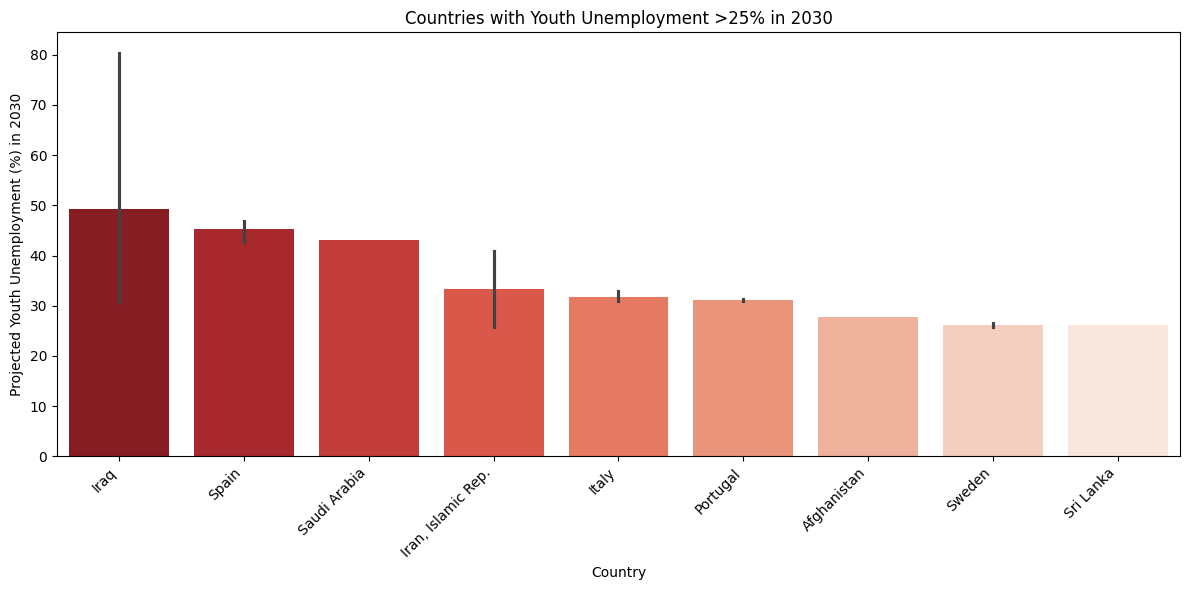

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(12,6))

# Barplot of countries vs projected youth unemployment
sns.barplot(
    data=high_youth_unemp_2030,
    x="Country Name",
    y="Projected_2030",
    palette="Reds_r"
)

# Rotate x labels for readability
plt.xticks(rotation=45, ha='right')

# Labels and title
plt.xlabel("Country")
plt.ylabel("Projected Youth Unemployment (%) in 2030")
plt.title("Countries with Youth Unemployment >25% in 2030")

plt.tight_layout()
plt.show()


In [21]:
import pandas as pd

# Paths to your CSV files
path_2000_2012 = "/content/drive/MyDrive/Colab Notebooks/TrendDataset/2000-2012_Export.csv"
path_2013_2024 = "/content/drive/MyDrive/Colab Notebooks/TrendDataset/2013-2024_Export.csv"

# Load CSVs with ISO-8859-1 encoding
df_export_2000_2012 = pd.read_csv(path_2000_2012, encoding='ISO-8859-1', low_memory=False)
df_export_2013_2024 = pd.read_csv(path_2013_2024, encoding='ISO-8859-1', low_memory=False)

# Quick check
print(df_export_2000_2012.shape, df_export_2013_2024.shape)


(41938, 47) (41876, 47)


In [26]:
# Merge 2000-2012 and 2013-2024 export datasets
df_export_total = pd.concat([df_export_2000_2012, df_export_2013_2024], ignore_index=True)

# Keep only relevant columns
df_export_total = df_export_total[['reporterDesc', 'partnerDesc', 'fobvalue']]

# Drop rows where any of these are missing
df_export_total = df_export_total.dropna(subset=['reporterDesc', 'partnerDesc', 'fobvalue'])

# Convert to string before stripping spaces
df_export_total['reporterDesc'] = df_export_total['reporterDesc'].astype(str).str.strip()
df_export_total['partnerDesc'] = df_export_total['partnerDesc'].astype(str).str.strip()

# Convert fobvalue to numeric, coercing errors
df_export_total['fobvalue'] = pd.to_numeric(df_export_total['fobvalue'], errors='coerce')

# Drop rows where fobvalue could not be converted
df_export_total = df_export_total.dropna(subset=['fobvalue'])

# Reset index
df_export_total = df_export_total.reset_index(drop=True)

print(df_export_total.shape)
df_export_total.head()

(83814, 3)


,reporterDesc,partnerDesc,fobvalue
0,X,0,209.0
1,X,0,22288.0
2,X,0,266645.0
3,X,0,390.0
4,X,0,1013.0


In [28]:
# Filter out placeholder values
df_export_filtered = df_export_total[~df_export_total['reporterDesc'].isin(['X', '0'])]
df_export_filtered = df_export_filtered[~df_export_filtered['partnerDesc'].isin(['0', 'X', 'World'])]

# Step 1: Group by reporter and partner to sum fobvalue
df_grouped = df_export_filtered.groupby(['reporterDesc', 'partnerDesc'])['fobvalue'].sum().reset_index()

# Step 2: Compute total exports per reporter
total_exports = df_grouped.groupby('reporterDesc')['fobvalue'].sum().reset_index()
total_exports = total_exports.rename(columns={'fobvalue': 'total_export'})

# Step 3: Merge total exports with grouped data
df_grouped = df_grouped.merge(total_exports, on='reporterDesc')

# Step 4: Compute share of each partner
df_grouped['share'] = df_grouped['fobvalue'] / df_grouped['total_export']

# Step 5: Trade Dependency Index = max share per reporter
tdi_df = df_grouped.groupby('reporterDesc')['share'].max().reset_index()
tdi_df = tdi_df.rename(columns={'share': 'Trade_Dependency_Index'})

# Step 6: Sort by TDI descending to identify most dependent countries
tdi_df = tdi_df.sort_values(by='Trade_Dependency_Index', ascending=False).reset_index(drop=True)

# Show top 10 most dependent countries
tdi_df.head(10)

,reporterDesc,Trade_Dependency_Index
